**Appendix: Code**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize
import seaborn as sns
import statsmodels.formula.api as sm
from scipy.stats import pearsonr
from distfit import distfit
import scipy
from scipy.interpolate import make_interp_spline
from scipy.stats import norm
import yahoo_fin.stock_info as si

# Apply the default theme
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mark Portfolio optimization

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from pypfopt import objective_functions

## PE Lifetime Cash flow plot

In [ ]:
year_time = np.arange(13)
contribution = np.array([1.606,22.892,48.333,22.892,4.277,0,0,0,0,0,0,0,0])
disturbution = np.array([0,0,0,17.477,73.372,0,0,7.989,16.767,11.384,0,0,4.502])

In [298]:
return_on_cash = np.insert((np.cumsum(disturbution) - np.cumsum(contribution))/np.cumsum(contribution),0,0)
year_time = np.arange(14)

In [299]:
X_Y_Spline = make_interp_spline(year_time, return_on_cash)
X_ = np.linspace(year_time.min(), year_time.max(), 500)
Y_ = X_Y_Spline(X_)

[Text(0.5, 0, 'Time(years)'), Text(0, 0.5, 'Return on Cash')]

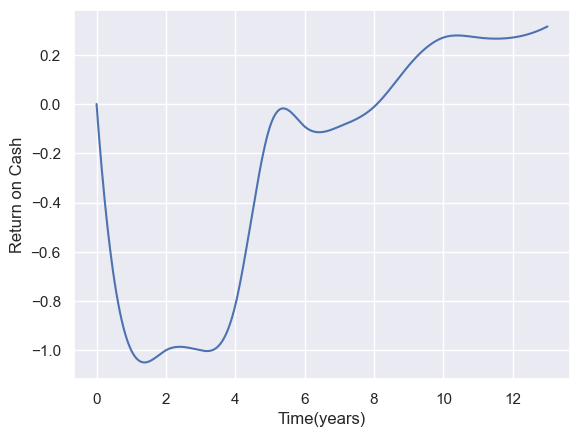

In [300]:
gfg = sns.lineplot(x=X_,y=Y_)
gfg.set(xlabel ="Time(years)", ylabel = "Return on Cash")

## Valdiated the model using stock data

https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/

https://towardsdatascience.com/automating-portfolio-optimization-using-python-9f344b9380b9

### Read S&P

In [301]:
sp500_ticker_list = si.tickers_sp500()

In [302]:
def all_stocks_df(tickers):
    df = pd.DataFrame()
    for ticker in tickers:
        try:
            df[ticker] = si.get_data(ticker,start_date = '01/01/2016',end_date ='31/12/2020').adjclose
        except:
            print(ticker,'date not avaliable')
            tickers.remove(ticker)
    drop_nan_columns = df.columns[df.isnull().sum() > 10]
    df.drop(drop_nan_columns,axis=1,inplace=True)
    
    return df,df.columns

In [303]:
df_stocks_all,sp500_ticker_list_avaliable = all_stocks_df(sp500_ticker_list)

CEG date not avaliable
GEHC date not avaliable
OGN date not avaliable


In [304]:
def random_stocks20(sp500_ticker_list_avaliable):
    
    rand_ticker_num = np.random.randint(len(sp500_ticker_list_avaliable)-1, size=20)
    rand_tciker_name = []
    df_stocks = pd.DataFrame()
    for i in rand_ticker_num:
        df_stocks[sp500_ticker_list_avaliable[i]] = si.get_data(sp500_ticker_list_avaliable[i],start_date = '01/01/2015',end_date ='31/12/2019').adjclose
    return df_stocks

In [305]:
df_stocks = random_stocks20(sp500_ticker_list_avaliable)
df_stocks.head()

,CRL,O,T,HSIC,INCY,WY,BBWI,SCHW,BK,CBOE,YUM,WHR,AMGN,JNJ,KEY,AMT,MSI,TMO,EQIX,PARA
2015-01-02,63.880001,33.151810,13.606718,53.662746,73.760002,25.632622,50.363689,27.541716,33.321041,60.234631,44.718002,152.632172,127.031952,83.703026,10.642365,84.665962,57.572784,125.031242,186.335403,46.550945
2015-01-05,64.379997,33.833664,13.478165,53.180393,74.220001,25.632622,49.608669,26.621229,32.464550,62.155003,43.809429,149.484818,125.522476,83.118416,10.319872,83.442734,56.317627,123.313675,184.419800,46.100647
2015-01-06,64.650002,34.276875,13.498251,52.870586,71.489998,25.604235,49.099476,25.646059,31.525705,62.801464,43.271694,148.251175,121.478462,82.709991,10.005052,83.221863,55.841522,122.162117,180.399597,45.191555
2015-01-07,66.199997,34.836010,13.576952,54.333332,74.449997,25.682316,50.948963,26.147306,32.176311,63.866219,44.705639,151.738586,125.721107,84.535889,10.081838,84.096817,55.772274,125.821732,180.991531,45.123577
2015-01-08,66.559998,33.915485,13.712029,55.098038,73.209999,25.959154,50.732418,26.830849,32.621021,63.219753,45.484425,155.653000,125.268211,85.200554,10.289155,84.878319,56.637909,127.129448,183.153763,45.658848


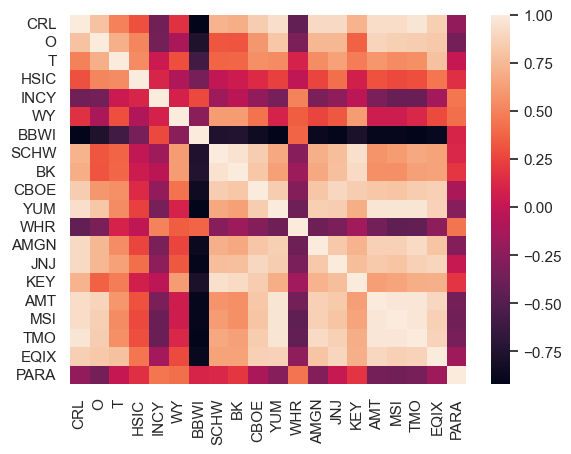

In [306]:
corr_matirx_stocks = df_stocks.corr()
sns.heatmap(corr_matirx_stocks)
plt.show()

#### Only for test

In [364]:
# df_stock_logre = np.log(df_stocks) - np.log(df_stocks.shift(1))
# df_stock_logre.dropna(axis=0,inplace=True)

In [365]:
# current_window_vol = df_stock_logre.std()/np.sqrt(1/252)
# current_window_corr = df_stock_logre.corr()/np.sqrt(1/252)
# current_window_mu = df_stock_logre.mean()*252 + 0.5*current_window_vol**2

In [366]:
# def stock_pred_df_corr(current_window_price):

#     df_stock_logre = np.log(current_window_price) - np.log(current_window_price.shift(1))
#     df_stock_logre.dropna(axis=0,inplace=True)
    
#     current_window_vol = df_stock_logre.std()/np.sqrt(1/252)
    
#     current_window_mu = df_stock_logre.mean()*252 + 0.5*current_window_vol**2
    
#     current_window_corr = df_stock_logre.corr()
#     L = np.linalg.cholesky(current_window_corr)
        
#     increment = pd.DataFrame()
#     for i in current_window_mu.index:
#         mu = current_window_mu[i]
#         sigma = current_window_vol[i]
#         dt = 1/12/21
#         size = 21
#         increment[i] = (mu -  sigma**2/2)*dt + sigma*np.sqrt(dt) * np.random.normal(size=size)
    
    
#     df_pred = pd.DataFrame()
#     for i,path in enumerate(np.dot(L,increment.values.T)):
#         df_pred[df_stock_logre.columns[i]] = np.exp(path.cumsum())*current_window_price.iloc[-1,i]
        
#         # print('last year last value',current_window_price[i][-1],'New year first prediction',stock_path[i][0])

#     return df_pred

In [367]:
# df_pred = stock_pred_df_corr(df_stocks)
# df_pred

In [312]:
# df_pred = pd.DataFrame()
# for i,path in enumerate(np.dot(l,x.T)):
#     df_pred[df_stocks.columns[i]] = np.exp(path.cumsum())*df_stocks.iloc[-1,i]


In [368]:
# df_stocks.tail()

In [315]:
# def stock_pred_df(current_window_price):

#     df_stock_logre = np.log(current_window_price) - np.log(current_window_price.shift(1))
#     df_stock_logre.dropna(axis=0,inplace=True)
    
#     current_window_vol = df_stock_logre.std()/np.sqrt(1/252)
    
#     current_window_mu = df_stock_logre.mean()*252 + 0.5*current_window_vol**2
    
        
#     stock_path = pd.DataFrame()
#     for i in current_window_mu.index:
#         mu = current_window_mu[i]
#         sigma = current_window_vol[i]
#         dt = 1/12/21
#         size = 21
#         stock_path[i] = np.exp(np.cumsum(((mu -  sigma**2/2)*dt + \
#                                                    sigma*np.sqrt(dt) * np.random.normal(size=size)), axis=0))*current_window_price[i][-1]
        
#         # print('last year last value',current_window_price[i][-1],'New year first prediction',stock_path[i][0])

#     return stock_path 

In [316]:
# de_pred = pd.DataFrame()
# for i in range(12):
#     df_pred_onemonth = stock_pred_df(df_stocks.iloc[12*i:(252+12*i)])
#     de_pred = pd.concat([de_pred,df_pred_onemonth])
# de_pred.reset_index(drop=True, inplace=True)

In [369]:
# de_pred.mean(axis=1).plot()

In [370]:
# scipy.stats.poisson.rvs(1, size=20)

### Comparing between models

#### SIAM vs Mark vs Equally weighted --- with same simulated data

In [319]:
# Only run one time!!!!!!!
df_stocks.drop(df_stocks.index[0] ,inplace=True)

In [320]:
# Validation idea
class SIAM_validate_stock():
    def __init__(self, start_year= 0 ,df_stocks_price = df_stocks, K=10, Max_length_month = 20, Expacted_logreturn= 0.01,lamda_exit = 5):
        self.start_year = start_year
        self.df_stocks_price_select = df_stocks_price.iloc[start_year*252:] #number of companies
        self.I = df_stocks_price.shape[1]
        self.K = K #number of iterations
        self.Max_length_month = Max_length_month 
        self.Expacted_logreturn = Expacted_logreturn
        self.lamda_exit = lamda_exit 
        
    def simu_k_scenairos(self):
        completion_time_Ktimes = []

        for k in range(self.K):
            completion_time = scipy.stats.poisson.rvs(self.lamda_exit, size=self.I)
            completion_time_Ktimes.append(completion_time)
        
        completion_time_Ktimes = np.array(completion_time_Ktimes)
        
        return completion_time_Ktimes
    
    # def calculate_return_df(self):
    #     df_stocks_return = np.log(self.df_stocks_price_select) - np.log(self.df_stocks_price_select.shift(1))
    #     df_stocks_return.dropna(axis=0,inplace = True)
        
    #     return df_stocks_return
    

    def stock_pred_df(self,current_window_price):

        df_stock_logre = np.log(current_window_price) - np.log(current_window_price.shift(1))
        df_stock_logre.dropna(axis=0,inplace=True)
        
        current_window_vol = df_stock_logre.std()/np.sqrt(1/252)
        current_window_mu = df_stock_logre.mean()*252 + 0.5*current_window_vol**2
            
        stock_path = pd.DataFrame()
        for i in current_window_mu.index:
            mu = current_window_mu[i]
            sigma = current_window_vol[i]
            dt = 1/12/21
            size = 21
            stock_path[i] = np.exp(np.cumsum(((mu -  sigma**2/2)*dt + \
                                                    sigma*np.sqrt(dt) * np.random.normal(size=size)), axis=0))*current_window_price[i][-1]

        return stock_path 
    
    def stock_pred_df_corr(self,current_window_price):

        df_stock_logre = np.log(current_window_price) - np.log(current_window_price.shift(1))
        df_stock_logre.dropna(axis=0,inplace=True)
        
        current_window_vol = df_stock_logre.std()/np.sqrt(1/252)
        
        current_window_mu = df_stock_logre.mean()*252 + 0.5*current_window_vol**2
        
        current_window_corr = df_stock_logre.corr()
        L = np.linalg.cholesky(current_window_corr)
            
        increment = pd.DataFrame()
        for i in current_window_mu.index:
            mu = current_window_mu[i]
            sigma = current_window_vol[i]
            dt = 1/12/21
            size = 21
            increment[i] = (mu -  sigma**2/2)*dt + sigma*np.sqrt(dt) * np.random.normal(size=size)
        
        
        df_pred = pd.DataFrame()
        for i,path in enumerate(np.dot(L,increment.values.T)):
            df_pred[df_stock_logre.columns[i]] = np.exp(path.cumsum())*current_window_price.iloc[-1,i]
            
            # print('last year last value',current_window_price[i][-1],'New year first prediction',stock_path[i][0])

        return df_pred
      
    
    def port_maxi(self,current_window_stock_price):
    
        #Annualized Return
        mu = expected_returns.mean_historical_return(current_window_stock_price)
        #Sample Variance of Portfolio
        Sigma = risk_models.sample_cov(current_window_stock_price)

        ef = EfficientFrontier(mu, Sigma, weight_bounds=(0,1)) #weight bounds in negative allows shorting of stocks
        ef.add_objective(objective_functions.L2_reg, gamma=1)
        sharpe_pfolio=ef.max_sharpe(risk_free_rate=0.005) #May use add objective to ensure minimum zero weighting to individual stocks
        sharpe_pwt=ef.clean_weights()
        
        return sharpe_pwt
    
    def SIAM_main(self):
             
        # Investment data
        
        investment_terminated_time_siam = np.zeros(self.K)
        investment_terminated_time_mark = np.zeros(self.K)
        investment_terminated_time_equalweight = np.zeros(self.K)

        for k in range(self.K):
            completion_time = scipy.stats.poisson.rvs(self.lamda_exit, size=self.I)
            max_exit_month = completion_time.max()

            sum_exit_return_siam = 0
            sum_exit_return_mark = 0
            sum_exit_return_equalweight = 0

            # Signal for whether this method in each simulation is finished
            signal_siam = 0
            signal_mark = 0
            signal_equal_weight = 0

            for t in range(max_exit_month):
                # stock data seen as historical 
                current_window_stocks = self.df_stocks_price_select.iloc[t*21:(t+12)*21]
                # current_window_return = df_stock_return.iloc[t*21:(t+12)*21]

                # Log return prediction for one month
                # stock_pred_df = self.stock_pred_df(current_window_stocks)
                stock_pred_df = self.stock_pred_df_corr(current_window_stocks)

                weight_df = self.port_maxi(current_window_stocks)

                # Weight calculated based on historical data * stock price prediction in one month
                if signal_mark == 0:
                    sum_exit_return_mark = np.sum( np.log((stock_pred_df.max()/ self.df_stocks_price_select.iloc[12*21,:]).values) * list(weight_df.values()))
                    # sum_exit_return_mark = np.sum( np.log((stock_pred_df.max()/ stock_pred_df.iloc[0,:]).values) * list(weight_df.values()))
                
                if signal_equal_weight == 0:
                    sum_exit_return_equalweight = np.mean(np.log((stock_pred_df.max()/ self.df_stocks_price_select.iloc[12*21,:]).values))
                    # print(sum_exit_return_equalweight,'sum_exit_return_equalweight','round',t,'simulation',k)

                # SIAM method 
                for company_i in range(self.I):
                    if (completion_time[company_i] == t) & (signal_siam == 0):
                        # Last prediction of the stock 
                        # log return for one company
                        max_price_onemonth = stock_pred_df.iloc[:,company_i].max()

                        # print( max_price_onemonth / self.df_stocks_price_select.iloc[12*21,company_i], 'is the log return for stock',company_i,'at time',t,'in simulation',k)

                        # sum_exit_return_siam = sum_exit_return_siam + np.log( stock_pred_df.iloc[-1,company_i] / self.df_stocks_price_select.iloc[12*21,company_i])/20 # df_stocks.iloc[12*21,:] is the investment t=0
                        sum_exit_return_siam = sum_exit_return_siam + np.log( max_price_onemonth / self.df_stocks_price_select.iloc[12*21,company_i])/20
                        # print('Simulation',k,'month',t,'return',sum_exit_return_siam,company_i,'exit')

                if (sum_exit_return_mark > self.Expacted_logreturn) & (signal_mark == 0):
                    investment_terminated_time_mark[k] = t + 1
                    signal_mark = 1
                    # print('Simulation',k,'exit at Round',t,'Success',sum_exit_return_mark)
                elif (t == max_exit_month-1) & (signal_mark == 0):
                    investment_terminated_time_mark[k] = np.nan
                    # print('Simulation',k,'exit at Round',t,'Failed',sum_exit_return_mark)

                
                if (sum_exit_return_siam > self.Expacted_logreturn) & (signal_siam == 0):
                    investment_terminated_time_siam[k] = t + 1
                    # print('Simulation',k,'exit at Round',t,'SIAM Success',sum_exit_return_siam)
                    signal_siam = 1
                    
                elif (t == max_exit_month-1) & (signal_siam == 0):
                    # print('Simulation',k,'exit at Round',t,'SIAM failed',sum_exit_return_siam)
                    investment_terminated_time_siam[k] = np.nan
                
                if (sum_exit_return_equalweight > self.Expacted_logreturn) & (signal_equal_weight == 0):
                    investment_terminated_time_equalweight[k] = t + 1
                    signal_equal_weight = 1
                elif (t == max_exit_month-1) & (signal_equal_weight == 0):
                    # print('Simulation',k,'exit at Round',t,'SIAM failed',sum_exit_return_siam)
                    investment_terminated_time_equalweight[k] = np.nan


        
        return np.nanmean(investment_terminated_time_mark),np.nanstd(investment_terminated_time_mark),(-np.isnan(investment_terminated_time_mark).sum()/self.K +1),np.nanmean(investment_terminated_time_siam),\
            np.nanstd(investment_terminated_time_siam),(-np.isnan(investment_terminated_time_siam).sum()/self.K + 1),np.nanmean(investment_terminated_time_equalweight),\
            np.nanstd(investment_terminated_time_equalweight),(-np.isnan(investment_terminated_time_equalweight).sum()/self.K +1)
    

In [321]:
SIAM_vali = SIAM_validate_stock(start_year= 0, K=100,Expacted_logreturn=0.05,lamda_exit = 5)
SIAM_vali.SIAM_main()

(1.59,
 0.6647555941848102,
 1.0,
 6.434343434343434,
 1.1206204645138313,
 0.99,
 2.45,
 1.3811227316933132,
 1.0)

#### Comparing Result: Actual Data vs SIMA vs Mark vs Equally weighted

Expected Reture $R^*$ measured by log return $\sum_{i \in I} \omega_{i} log \frac{W_{T,i}}{W_{0,i}}$

In [322]:
def actual_terminated_time(start_year,df_stocks):

    result_only_end_date = []
    result_all_date = []
    df_stocks_select = df_stocks.iloc[start_year*252:]

    for month in np.arange(12,12*3):

        result_only_end_date.append(np.log(df_stocks_select.iloc[month*21,:]/df_stocks_select.iloc[252,:]).mean())
        result_all_date.append(np.log(df_stocks_select.iloc[month*21:(month+1)*21,:].max()/df_stocks_select.iloc[252,:]).mean())
    return np.array(result_only_end_date),np.array(result_all_date)

In [323]:
# Actual Termianl time dataframe
expected_logreturn = np.array([0.03,0.05,0.07,0.09,0.11,0.13])
start_year = np.array([0,1,2])

actual_terminal_time = np.array([])

for year in start_year:

    flag = 0
    
    _,actual_return_alldate = actual_terminated_time(year,df_stocks)
    terminal_time = np.array([])
    
    for r in expected_logreturn:
        for count,logreturn in enumerate(actual_return_alldate):
            if logreturn > r:
                terminal_time = np.append(terminal_time,count+1)
                flag = 1
                # print('Year',year,'Expected r',r,'stop at',terminal_time)
                break
        if count + 1 == len(actual_return_alldate):
            terminal_time = np.append(terminal_time,np.nan)

    actual_terminal_time = np.append(actual_terminal_time,terminal_time)

     

In [324]:
mark_mean_list = []
mark_std_list = []
mark_nan_list= []
siam_mean_list = []
siam_std_list = []
siam_nan_list = []
equal_we_mean_list = []
equal_we_std_list = []
equal_weight_nan_list = []


for year in start_year:
    for r in expected_logreturn:
        SIAM_vali = SIAM_validate_stock(start_year= year, K=50,Expacted_logreturn= r ,lamda_exit = np.rint(r*70))
        mark_mean,mark_std,mark_nan,siam_mean,siam_std,siam_nan,equal_we_mean,equal_we_std,equal_weight_nan = SIAM_vali.SIAM_main()

        mark_mean_list.append(mark_mean)
        mark_std_list.append(mark_std)
        mark_nan_list.append(mark_nan)

        siam_mean_list.append(siam_mean)
        siam_std_list.append(siam_std)
        siam_nan_list.append(siam_nan)

        equal_we_mean_list.append(equal_we_mean)
        equal_we_std_list.append(equal_we_std)
        equal_weight_nan_list.append(equal_weight_nan)



KeyboardInterrupt: 

In [ ]:
start_year_rename = np.array(['2017','2018','2019'])
Compar_result_df = pd.DataFrame({'Expected Log Return':np.tile(expected_logreturn,len(start_year_rename)),
                                 'Start Year':np.repeat(start_year_rename,len(expected_logreturn)),
                                 'Actual Terminated Time':actual_terminal_time,
                                 'SIAM Mean':siam_mean_list,
                                 'SIAM Std':siam_std_list,
                                 'SIAM Success Rate':siam_nan_list,
                                 'Markowitz Mean':mark_mean_list,
                                 'Markowitz Std':mark_std_list,
                                 'Markowitz Success Rate':mark_nan_list,
                                 'Equal Weight Mean':equal_we_mean_list,
                                 'Equal Weight  Std':equal_we_std_list,
                                 'Equal Weight  Success Rate':equal_weight_nan_list,
                                 })

In [ ]:
Compar_result_df

,Expected Log Return,Start Year,Actual Terminated Time,SIAM Mean,SIAM Std,SIAM Success Rate,Markowitz Mean,Markowitz Std,Markowitz Success Rate,Equal Weight Mean,Equal Weight Std,Equal Weight Success Rate
0,0.03,2017,3.0,3.742857,0.936341,0.70,1.30,0.458258,1.0,1.720000,1.000800,1.00
1,0.05,2017,3.0,5.851064,1.051417,0.94,1.50,0.700000,1.0,2.220000,1.136486,1.00
2,0.07,2017,4.0,7.265306,0.875413,0.98,2.14,0.872009,1.0,3.440000,1.022937,1.00
3,0.09,2017,4.0,8.755102,1.020816,0.98,2.96,1.057544,1.0,4.380000,1.324991,1.00
4,0.11,2017,6.0,10.500000,1.414214,0.96,3.72,1.249640,1.0,5.200000,1.131371,1.00
5,0.13,2017,7.0,12.736842,1.915095,0.76,4.48,1.153083,1.0,5.940000,1.138596,1.00
6,0.03,2018,1.0,2.571429,0.494872,0.98,1.22,0.414246,1.0,1.220000,0.414246,1.00
7,0.05,2018,2.0,5.020408,1.097117,0.98,1.42,0.493559,1.0,1.540000,0.606960,1.00
8,0.07,2018,2.0,6.938776,0.912681,0.98,1.66,0.586856,1.0,1.920000,0.744043,1.00
9,0.09,2018,5.0,8.634146,1.224866,0.82,2.02,0.468615,1.0,2.660000,0.839285,1.00


In [ ]:
print(Compar_result_df.to_latex())

\begin{tabular}{lrlrrrrrrrrrr}
\toprule
{} &  Expected Log Return & Start Year &  Actual Terminated Time &  SIAM Mean &  SIAM Std &  SIAM Success Rate &  Markowitz Mean &  Markowitz Std &  Markowitz Success Rate &  Equal Weight Mean &  Equal Weight  Std &  Equal Weight  Success Rate \\
\midrule
0  &                 0.03 &       2017 &                     3.0 &   4.625000 &  0.695971 &               0.16 &            1.18 &       0.517301 &                     1.0 &               1.24 &           0.813880 &                         1.0 \\
1  &                 0.05 &       2017 &                     4.0 &   6.333333 &  0.881917 &               0.72 &            1.40 &       0.824621 &                     1.0 &               2.54 &           1.699529 &                         1.0 \\
2  &                 0.07 &       2017 &                     4.0 &   8.000000 &  1.010153 &               0.98 &            2.00 &       1.131371 &                     1.0 &               4.94 &           1.027

Text(0, 0.5, 'SIAM terminal time for the portfoilo')

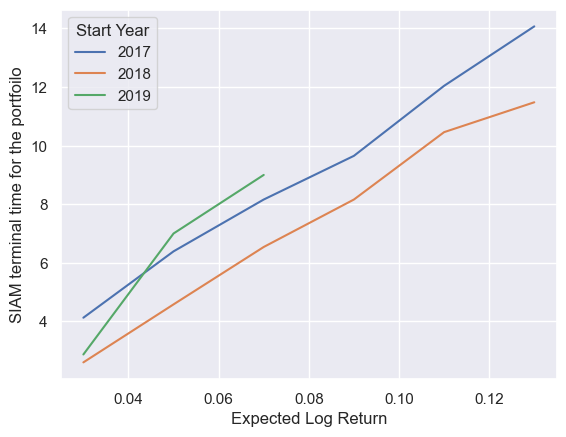

In [ ]:
sns.lineplot(data = Compar_result_df, x = 'Expected Log Return',y='SIAM Mean',hue = 'Start Year')
plt.ylabel('SIAM terminal time for the portfoilo')

### old SIAM for stocks

In [ ]:
# prediction for furture 21 business day (one month)
# 12*21=252 Business day in one year
# def stockprice_increase(r=df_stocks_log.iloc[:12*21,1].mean(),sigma=df_stocks_log.iloc[:12*21,1].std()):
#     size= 21 # total simulations
#     T = 1/12 # simulate for a month
#     dt = 1/12/21 # T/total simulations
#     geo = np.cumsum(((r -  sigma**2/2)*dt +\
#                               sigma*np.sqrt(dt) * \
#                               np.random.normal(size=size)), axis=0)
#     return geo[-1]

In [ ]:
# def calculate_return_df(df):
#     df_stocks_return = np.log(df) - np.log(df.shift(1))
#     df_stocks_return.dropna(axis=0,inplace = True)
        
#     return df_stocks_return

In [ ]:
# completion_time_Ktimes = []
# for k in range(10):
#     completion_time = scipy.stats.poisson.rvs(1, size=20)
# #             completion_time_lognorm = scipy.stats.gamma.rvs(self.Time_to_exit_params[0],loc=self.Time_to_exit_params[1],scale=self.Time_to_exit_params[2], size=self.I)
# #             completion_time = np.rint(completion_time_lognorm)
#     completion_time_Ktimes.append(completion_time)
# completion_time_Ktimes[0][0]

## Testing the model for PE deals data

### Read PE deals data

In [ ]:
Deal_US_df = pd.read_csv('SPGlobal_Export_UScompanies_ROF_Exit_deals.csv',thousands=",",decimal=".")
Deal_US_df.head()

,Target/Issuer Name,MI Transaction ID,Transaction Status,Total Transaction Value ($M),Transaction Geography,Announced Date (dd/mm/yyyy),Transaction Type,Buyers/Investors,Sellers
0,"(m)PHASIZE, LLC",SPTRD480892,Completed,18.18,United States and Canada,27/12/2012,M&A - Whole,Sapient Corp.,"(m)PHASIZE, LLC"
1,@Motion,SPTRD836504,Completed,339.49,United States and Canada,08/02/2000,M&A - Whole,"Great Elm Group, Inc. (NASDAQGS:GEG)","DCM Ventures Inc.; Brad Peery Capital, Inc."
2,"@Road, Inc.",SPTRD412890,Completed,414.76,United States and Canada,11/12/2006,M&A - Whole,Trimble Inc. (NASDAQGS:TRMB),"Institutional Venture Partners VIII, L.P.; Ins..."
3,"@Road, Inc.",SPTRO443408,Terminated/Withdrawn,104.65,United States and Canada,24/03/2000,ECM - IPO,NaN,NaN
4,"@Road, Inc.",SPTRO459452,Completed,63.00,United States and Canada,13/07/2000,ECM - IPO,NaN,NaN


In [ ]:
# Deal_UK_df = pd.read_csv('SPGlobal_Export_deals_ROF_Exit_UK.csv',thousands=",",decimal=".")
# Deal_UK_df.tail()

In [ ]:
# clean data --- data type and select deals after 2000
def data_preprocess(Deal_df):
    Deal_df.drop(Deal_df.loc[Deal_df['Announced Date (dd/mm/yyyy)']=='#INVALID COMPANY ID'].index, inplace=True)
    Deal_df['Announced Date (dd/mm/yyyy)'] = pd.to_datetime(Deal_df['Announced Date (dd/mm/yyyy)'])
    Deal_df['Total Transaction Value ($M)'] = pd.to_numeric(Deal_df['Total Transaction Value ($M)'],errors='coerce')
    
    # Delete those before 2000
    idx_ealier = Deal_df[Deal_df['Announced Date (dd/mm/yyyy)'] < '2000-01-01 00:00:00'].index
    Deal_df.drop(idx_ealier, inplace=True)
    Deal_df.reset_index()

    # Delete deals not complete
    Deal_df = Deal_df[Deal_df['Transaction Status '] == 'Completed']	
    Deal_df.index =  range(len(Deal_df.index))
    return Deal_df

In [357]:
Deal_US_df = data_preprocess(Deal_US_df)
# Deal_UK_df = data_preprocess(Deal_UK_df)

In [ ]:
Deal_US_df.columns

Index(['Target/Issuer Name ', 'MI Transaction ID ', 'Transaction Status ',
       'Total Transaction Value ($M)', 'Transaction Geography ',
       'Announced Date (dd/mm/yyyy)', 'Transaction Type ', 'Buyers/Investors ',
       'Sellers '],
      dtype='object')

In [371]:
Deal_US_df.shape

(40441, 9)

### Creat different dataframe that we need

#### Dataset with deals and deal's infromation

In [356]:
def deals_refine(Deal_df):
    # Drop not useful columns
    deal_df = Deal_df.drop(columns =['MI Transaction ID ', 'Transaction Status ','Transaction Geography ','Buyers/Investors ','Sellers '])

    #drop ROF after 2018
    # Delete ROF after 2018
    idx_later = deal_df[(deal_df['Transaction Type '].str.contains('ROF')) & (deal_df['Announced Date (dd/mm/yyyy)'] > '2018-01-01 00:00:00')].index
    deal_df.drop(idx_later, inplace=True)

    # Encode deal type
    deal_df['Transcation_type'] = deal_df['Transaction Type ']
    
    for  row_index in deal_df.index:
        row_str = deal_df.loc[row_index,'Transaction Type ']
        if 'ROF' in row_str:
            deal_df.loc[row_index,'Transcation_type'] = 0
        elif 'IPO' in row_str:
            deal_df.loc[row_index,'Transcation_type'] = 1
        elif 'M&A' in row_str:
            deal_df.loc[row_index,'Transcation_type'] = 2

    deal_df_numtype = deal_df.drop(columns =['Transaction Type '])

    # Merge deals on one day as one deal
    deal_df_refine = pd.DataFrame({'Total Transaction Value ($M)' : deal_df_numtype.groupby(['Target/Issuer Name ','Announced Date (dd/mm/yyyy)','Transcation_type'])['Total Transaction Value ($M)'].sum()}).reset_index()
    deal_df_refine.sort_values(by = ['Target/Issuer Name ','Announced Date (dd/mm/yyyy)'],inplace = True)

    # deal_df_refine = deal_df_numtype_1.sort_values(by=['Target/Issuer Name ','Announced Date (dd/mm/yyyy)'],ascending = [True, True])

    deal_df_refine.index =  range(len(deal_df_refine.index))
    
    return deal_df_refine
            



In [358]:
Deal_US_refine = deals_refine(Deal_US_df)
Deal_US_refine.head()

,Target/Issuer Name,Announced Date (dd/mm/yyyy),Transcation_type,Total Transaction Value ($M)
0,"(m)PHASIZE, LLC",2012-12-27,2,18.18
1,"0-In Design Automation, Inc.",2001-12-12,0,8.00
2,"0-In Design Automation, Inc.",2004-01-09,2,49.34
3,"1 Hotel South Beach, Inc.",2012-01-02,2,230.00
4,"1 Hotel South Beach, Inc.",2019-02-14,2,610.00


In [359]:
Deal_US_refine.shape

(35640, 4)

In [ ]:
# Plot all deals
# sns.scatterplot(data=Deal_US_refine,x='Announced Date (dd/mm/yyyy)',y='Total Transaction Value ($M)',hue='Transcation_type')

#### Dataframe with company go through rounds information

Following refine dataset
Each company only consider one group of deals (ROF + Exit)
1. Rank by date 
2. find the first 0 / no 0 label 2 
3. end with first 1 or 2 / no 1 or 2 after 0 then label 1  
4. drop all other rows and label 0


In [343]:
def data_select_ROF_exit_test(Deal_Refine):
    
    type_label = np.array([])
    grouped_comp = Deal_Refine.groupby('Target/Issuer Name ')

    for name, group in grouped_comp:
        if 0 not in group['Transcation_type'].values:
            if 1 in group['Transcation_type'].values:
                label = 'Only_IPO'
            else:
                label = 'Only_MA'
        else:
            idex_0 = group['Transcation_type'].to_list().index(0)
            if 1 in group.loc[idex_0:,'Transcation_type'].values:
                label = 'RoF_IPO'

                idex_1 = group.loc[idex_0:,'Transcation_type'].to_list().index(1)

                drop_idx1 = group.index.tolist()[:idex_0] + group.index.tolist()[idex_1+1:]
                Deal_Refine.drop(index=drop_idx1, inplace = True)

            elif 2 in group.loc[idex_0:,'Transcation_type'].values:
                label = 'RoF_MA'

                idex_2 = group.loc[idex_0:,'Transcation_type'].to_list().index(2)

                drop_idx2 = group.index.tolist()[:idex_0] + group.index.tolist()[idex_2+1:]
                Deal_Refine.drop(index=drop_idx2, inplace = True)
            else:
                label = 'Only_RoF'
        type_label = np.append(type_label,np.repeat(label,group.shape[0]))

    Deal_Refine['Company_tran_type'] = pd.Series(type_label)
        
    
    return Deal_Refine

In [360]:
Deal_US_company_refine = data_select_ROF_exit_test(Deal_US_refine)

In [362]:
Deal_US_company_refine.tail()

,Target/Issuer Name,Announced Date (dd/mm/yyyy),Transcation_type,Total Transaction Value ($M),Company_tran_type
35635,xVault Inc,2000-04-18,2,5.90,Only_MA
35636,zipRealty Inc.,2000-10-08,0,10.00,Only_RoF
35637,zipRealty Inc.,2001-05-18,0,7.89,Only_RoF
35638,zipRealty Inc.,2002-11-02,0,8.86,Only_RoF
35639,zipRealty Inc.,2002-12-31,0,12.93,Only_RoF


In [363]:
Deal_US_company_refine['Company_tran_type'].value_counts()

Only_MA     20883
Only_RoF     7391
Only_IPO     3564
RoF_MA       2323
RoF_IPO       878
Name: Company_tran_type, dtype: int64

In [1]:
(2323+878)/(7391 +2323+878)
sns.scatterplot(data=Deal_US_company_refine[Deal_US_company_refine['Total Transaction Value ($M)'] <10000],x='Announced Date (dd/mm/yyyy)',y='Total Transaction Value ($M)',hue='Company_tran_type')

0.30220921450151056

<AxesSubplot: xlabel='Announced Date (dd/mm/yyyy)', ylabel='Total Transaction Value ($M)'>

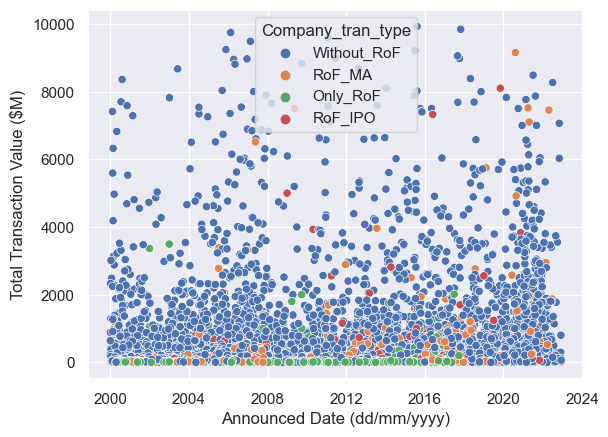

In [334]:
sns.scatterplot(data=Deal_US_company_refine[Deal_US_company_refine['Total Transaction Value ($M)'] <10000],x='Announced Date (dd/mm/yyyy)',y='Total Transaction Value ($M)',hue='Company_tran_type')

#### Select company go through ROF, M&A whole/IPO and known deal amount

Some exit was drop even if the exit time is before certain date (because we only keep the first occurence)

In [ ]:
# def data_select_ROF_exit(Deal_df):
#     Deal_df_select = Deal_df[ (Deal_df['Company_tran_type'] == 'RoF_MA') | (Deal_df['Company_tran_type'] =='RoF_IPO')]
#     Deal_df_select.index =  range(len(Deal_df_select.index))
    
#     # Creat df for ROF and Exit 
#     Deal_df_select_ROF = Deal_df_select[Deal_df_select['Transcation_type'] == 0]
#     Deal_df_select_exit = Deal_df_select[(Deal_df_select['Transcation_type'] == 1) | (Deal_df_select['Transcation_type'] == 2)]
    
#     # For df ROF -- sum all transcations one the same date
    
#     Deal_df_select_ROF_1 = pd.DataFrame({'Total Transaction Value ($M)' : Deal_df_select_ROF.groupby(['Target/Issuer Name ','Announced Date (dd/mm/yyyy)'])['Total Transaction Value ($M)'].sum()}).reset_index()
#     Deal_df_select_ROF_1.sort_values(by = ['Target/Issuer Name ','Announced Date (dd/mm/yyyy)'],inplace = True)
    
#     unique_company_name = Deal_df_select_ROF_1['Target/Issuer Name '].unique()
    
#     return Deal_df_select_ROF_1,Deal_df_select_exit,unique_company_name

In [429]:
Deal_US_RoF_exit = Deal_US_company_refine[(Deal_US_company_refine['Company_tran_type'] == 'RoF_MA') | (Deal_US_company_refine['Company_tran_type'] == 'RoF_IPO') ]
Deal_US_RoF_exit.index = range(len(Deal_US_RoF_exit.index))


In [431]:
Deal_US_RoF_exit = Deal_US_RoF_exit[['Target/Issuer Name ','Announced Date (dd/mm/yyyy)','Transcation_type','Total Transaction Value ($M)']]

In [432]:
Deal_US_RoF_exit.head()

,Target/Issuer Name,Announced Date (dd/mm/yyyy),Transcation_type,Total Transaction Value ($M)
0,"0-In Design Automation, Inc.",2001-12-12,0,8.00
1,"0-In Design Automation, Inc.",2004-01-09,2,49.34
2,"128 Technology, Inc.",2017-05-23,0,30.69
3,"128 Technology, Inc.",2020-10-19,2,448.20
4,"1st Independence Financial Group, Inc.",2003-03-26,0,5.00


In [419]:
for i in range(1168):
    comp_name = Deal_US_RoF_exit['Target/Issuer Name '].unique()[i]
    Company_deals_df = Deal_US_RoF_exit[Deal_US_RoF_exit['Target/Issuer Name ']== comp_name]
    x = [ (i - Company_deals_df['Announced Date (dd/mm/yyyy)'].tolist()[-1])/np.timedelta64(1, 'D') / 365 for i in Company_deals_df['Announced Date (dd/mm/yyyy)'].tolist()[:-1] ]
# Deal_US_RoF_exit[Deal_US_RoF_exit['Target/Issuer Name ']== comp_name]['Announced Date (dd/mm/yyyy)'].diff().tolist()[:-1] + [np.nan]

In [410]:
[ (i - Deal_US_RoF_exit[Deal_US_RoF_exit['Target/Issuer Name ']== comp_name]['Announced Date (dd/mm/yyyy)'].tolist()[-1])/np.timedelta64(1, 'D') / 365 for i in Deal_US_RoF_exit[Deal_US_RoF_exit['Target/Issuer Name ']== comp_name]['Announced Date (dd/mm/yyyy)'].tolist()[:-1] ]


[-0.39452054794520547]

In [451]:
def RoF_exit_add_col(Deal_RoF_exit):
    Year_to_exit = np.array([])
    Round_diff =  np.array([])
    
    for i in Deal_RoF_exit['Target/Issuer Name '].unique():
        Company_deals_df = Deal_RoF_exit[Deal_RoF_exit['Target/Issuer Name ']== i]
        exit_time = Company_deals_df['Announced Date (dd/mm/yyyy)'].tolist()[-1]

        comp_time_to_exit = [ (exit_time - ti)/np.timedelta64(1, 'D')/365 for ti in Company_deals_df['Announced Date (dd/mm/yyyy)'].tolist()[:-1] ]

        Year_to_exit = np.append(Year_to_exit,comp_time_to_exit + [np.nan])

        comp_Round_diff = Company_deals_df['Announced Date (dd/mm/yyyy)'].diff().tolist()[:-1]

        Round_diff = np.append(Round_diff,comp_Round_diff+[np.nan])

    Deal_RoF_exit['Year_to_exit'] = pd.Series(Year_to_exit)

    Deal_RoF_exit['Round_diff'] = pd.Series(Round_diff)

    print('Total number of companies: ',len(Deal_RoF_exit['Target/Issuer Name '].unique()),'\n')
    print('Total number of RoF deals per company: ',Deal_RoF_exit.shape[0]/len(Deal_RoF_exit['Target/Issuer Name '].unique()) -1,'\n')
    print('Summary of Round of financing:')
    print(Deal_RoF_exit[Deal_RoF_exit['Transcation_type'] == 0].describe())
    print('\n','Summary of Exit via IPO:')
    print(Deal_RoF_exit[Deal_RoF_exit['Transcation_type'] == 1].describe())
    print('\n','Summary of Exit via MA:')
    print(Deal_RoF_exit[Deal_RoF_exit['Transcation_type'] == 2].describe())

    return Deal_RoF_exit  

In [452]:
Deal_US_RoF_added = RoF_exit_add_col(Deal_US_RoF_exit)

Total number of companies:  1168 

Total number of RoF deals per company:  1.7405821917808217 

Summary of Round of financing:
       Transcation_type  Total Transaction Value ($M)  Year_to_exit  \
count            2031.0                   2031.000000   2031.000000   
mean                0.0                     44.113294      4.765759   
std                 0.0                    292.079604      3.520926   
min                 0.0                      0.000000      0.000000   
25%                 0.0                      5.000000      2.064384   
50%                 0.0                     11.500000      4.115068   
75%                 0.0                     25.000000      6.845205   
max                 0.0                   7500.000000     21.126027   

                        Round_diff  
count                          863  
mean   666 days 18:27:56.940903824  
std    606 days 15:36:34.144583920  
min                1 days 00:00:00  
25%              280 days 00:00:00  
50%        

In [449]:
# Clean including: ( one problem ,ight drop to many exit value)
# 1. including investment before exit 
# 4. exit value not 0
# 5. add time to exit colnum / time-diff

# def clean_data_select_ROF_exit(Deal_df_select_ROF,Deal_df_select_exit,unique_company_name):
#     Year_to_exit = []
#     Round_diff = []
#     #count_check = 0
    
#     # 1 & 4 
#     for i in unique_company_name:
#         Exit_row = Deal_df_select_exit[Deal_df_select_exit['Target/Issuer Name '] == i]
#         ROF_investment_date_DF = Deal_df_select_ROF[Deal_df_select_ROF['Target/Issuer Name '] == i]
        
#         rounds = 0
#         year_to_exit_one_company = []
        
#         for index,row in ROF_investment_date_DF.iterrows():
#             exit_date = Exit_row['Announced Date (dd/mm/yyyy)'].values[0]
#             rof_investment_date = row['Announced Date (dd/mm/yyyy)']
            
#             exit_value = row['Total Transaction Value ($M)']
            
#             # Valid round of financing : 1. investment before exit 2. exit value != 0
#             if (exit_date > rof_investment_date) & (exit_value > 0):
#                     rounds = rounds + 1
#                     #count_check = count_check + 1
#                     year_to_exit_one_company.append((exit_date - rof_investment_date)/np.timedelta64(1, 'D') / 365)
#             else:
#                 # Drop the investments that happen after the exit
#                  Deal_df_select_ROF.drop(index,inplace = True)
                    
#         # For company that all rof after exit
#         if rounds == 0:
#             Deal_df_select_exit.drop(Exit_row.index,inplace = True)
#             unique_company_name = unique_company_name[unique_company_name != i]
#         else:
#             Year_to_exit = Year_to_exit + year_to_exit_one_company
            
#     Deal_df_select_ROF.index =  range(len(Deal_df_select_ROF.index))
#     Deal_df_select_exit.index =  range(len(Deal_df_select_exit.index))
    
#     Deal_df_select_ROF['Year_to_exit'] = pd.Series(Year_to_exit)
        
#     for i in unique_company_name:
#         ROF_investment_date_DF = Deal_df_select_ROF[Deal_df_select_ROF['Target/Issuer Name '] == i]
            
#         if ROF_investment_date_DF.shape[0] > 1:
#             Round_diff.extend(ROF_investment_date_DF['Year_to_exit'].diff(periods=-1).to_list())
#         else:
#             Round_diff.append('NaN')
    
#     Deal_df_select_ROF['Round_diff'] = pd.Series(Round_diff)
#     Deal_df_select_ROF['Round_diff'] = pd.to_numeric(Deal_df_select_ROF['Round_diff'],errors='coerce')
    
#     return Deal_df_select_ROF,Deal_df_select_exit,unique_company_name

Summary:
1. Companies --- total number
2. RoF deals number --- Total number / average per company / std
3. RoF deals amount --- Total number / average per company / std
4. RoF time difference --- avg per company/ std
5. Exit value -- Total number / average per company / std
6. Exit via IPO -- Total number / average per company / std
7. Exit via M&A --- Total number / average per company / std
8. First round to exit duation --- average / std

In [ ]:
# Deal_US_ROF,Deal_US_Exit,US_compname = data_select_ROF_exit(Deal_US_df)

In [ ]:
# Deal_US_ROF['Target/Issuer Name '].nunique() 

1917

In [ ]:
# Deal_US_ROF,Deal_US_Exit,US_compname = clean_data_select_ROF_exit(Deal_US_ROF,Deal_US_Exit,US_compname)

In [ ]:
# print_data_ROF_exit(Deal_US_ROF,Deal_US_Exit,US_compname)

Total number of companies:  1450 

Total number of RoF deals per company:  1.7089655172413794 

Summary of Round of financing:
       Total Transaction Value ($M)  Year_to_exit   Round_diff
count                   2478.000000   2478.000000  1028.000000
mean                      48.563713      4.771654     1.798404
std                      287.005542      3.869385     1.642656
min                        0.010000      0.002740     0.002740
25%                        5.000000      1.706849     0.747945
50%                       11.000000      3.950685     1.335616
75%                       26.000000      7.021918     2.243836
max                     7500.000000     21.641096    11.117808

 Summary of Exit:
       Total Transaction Value ($M)
count                   1450.000000
mean                     520.194807
std                     1775.662957
min                        0.100000
25%                       42.887500
50%                      133.780000
75%                      398.295000

### Reform Data

#### Creat df that all RoF for one company 

In [ ]:
def reform_dataset_by_company(Deal_df_select_ROF,Deal_df_select_exit,unique_company_name):
    
    max_rounds = Deal_df_select_ROF.groupby('Target/Issuer Name ').size().max()
    RoF_invest_matrix = []
    
    extreme_company_name = []
    for i in unique_company_name:
        Exit_row = Deal_df_select_exit[Deal_df_select_exit['Target/Issuer Name '] == i]
        ROF_investment_date_DF = Deal_df_select_ROF[Deal_df_select_ROF['Target/Issuer Name '] == i]
        
        investment_amount_comp = np.zeros(max_rounds)
        rounds = 0
        
        if ROF_investment_date_DF.shape[0] > 7:
            extreme_company_name.append(i)
            
        for index,row in ROF_investment_date_DF.iterrows():
            investment_amount_comp[rounds] = row['Total Transaction Value ($M)']
            rounds = rounds + 1
        RoF_invest_matrix.append(investment_amount_comp)
    RoF_invest_matrix = np.array(RoF_invest_matrix)
    
    df_col_name = ["Rounds {}".format(i) for i in range(max_rounds)]
    df = pd.DataFrame(RoF_invest_matrix,columns=df_col_name) #    df = pd.DataFrame(RoF_invest_matrix) 
    
    return df,extreme_company_name

In [ ]:
df,extrem_name = reform_dataset_by_company(Deal_US_ROF,Deal_US_Exit,US_compname )

#### Company as a row with Adjusted sum of investment

For each company, the adjusted investment amount = $\sum_{t \in \{1,\cdots, T\}} I_t * (1+r)^{(T-t)} $

In [ ]:
# Return use adjusted return 
def adjuested_investment_company_df(Deal_df_select_ROF,Deal_df_select_exit,company_name):
    exit_value = []
    adjust_investment_amount = []
    sum_investment_amount = []
    duration = []
    number_of_rounds = []
    
    for i in company_name:
        ROF_investment_date_DF = Deal_df_select_ROF[Deal_df_select_ROF['Target/Issuer Name '] == i]
        Exit_DF = Deal_df_select_exit[Deal_df_select_exit['Target/Issuer Name '] == i]
        
        exit_value.append(Exit_DF['Total Transaction Value ($M)'].values[0])
        number_of_rounds.append(ROF_investment_date_DF.shape[0])
        
        duration.append(ROF_investment_date_DF['Year_to_exit'].min())
        
        sum_investment_amount.append(ROF_investment_date_DF['Total Transaction Value ($M)'].sum())
        
        adjust_investment_amount_value = 0
        
        for index,row in ROF_investment_date_DF.iterrows():
            time_in_years = row['Year_to_exit']
            investment_amount = row['Total Transaction Value ($M)']
            adjust_investment_amount_value = adjust_investment_amount_value + investment_amount*np.power(1.05,time_in_years)
            
        adjust_investment_amount.append(adjust_investment_amount_value)
    
    df = pd.DataFrame({'exit_value':exit_value,'adjust_investment_amount':adjust_investment_amount,
                       'sum_invest_amount':sum_investment_amount,
                       'net_adj_return': np.array(exit_value) - np.array(adjust_investment_amount),
                       'Time_to_exit':duration,'number_of_rounds':number_of_rounds,
                       'log_exit_value':np.log(exit_value),'log_adjust_investment_amount':np.log(adjust_investment_amount),
                       'log_sum_invest_amount':np.log(sum_investment_amount),
                       'log_Time_to_exit':np.log(duration),'log_number_of_rounds':np.log(number_of_rounds)})
    
    return df

In [ ]:
Aj_US_ROF_exit_df = adjuested_investment_company_df(Deal_US_ROF,Deal_US_Exit,US_compname)

In [ ]:
Aj_US_ROF_exit_df.describe()

,exit_value,adjust_investment_amount,sum_invest_amount,net_adj_return,Time_to_exit,number_of_rounds,log_exit_value,log_adjust_investment_amount,log_sum_invest_amount,log_Time_to_exit,log_number_of_rounds
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,520.194807,99.924013,82.993710,420.270794,3.620255,1.708966,4.815511,2.910583,2.703988,0.685555,0.359996
std,1775.662957,708.938429,614.626805,1810.267582,3.523433,1.296378,1.791479,1.703434,1.680341,1.343079,0.535060
min,0.100000,0.010770,0.010000,-11645.627337,0.002740,1.000000,-2.302585,-4.530982,-4.605170,-5.899897,0.000000
25%,42.887500,7.162052,6.000000,19.860399,0.957534,1.000000,3.758580,1.968795,1.791759,-0.043397,0.000000
50%,133.780000,18.361494,15.000000,91.659866,2.538356,1.000000,4.896196,2.910256,2.708050,0.931515,0.000000
75%,398.295000,51.147212,40.000000,324.138530,5.176027,2.000000,5.987190,3.934707,3.688879,1.644037,0.693147
max,48584.850000,18562.578192,15405.280000,48572.598777,21.126027,14.000000,10.791067,9.828903,9.642466,3.050506,2.639057


<AxesSubplot:>

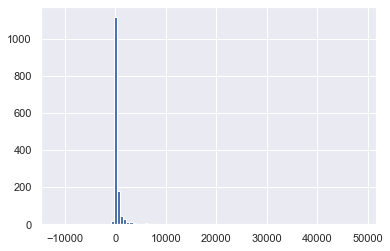

In [ ]:
Aj_US_ROF_exit_df['net_adj_return'].hist(bins=100)

In [ ]:
Aj_UK_ROF_exit_df = adjuested_investment_company_df(Deal_UK_ROF,Deal_UK_Exit,UK_compname)

In [ ]:
Aj_UK_ROF_exit_df.describe()

,exit_value,adjust_investment_amount,sum_invest_amount,net_adj_return,Time_to_exit,number_of_rounds,log_exit_value,log_adjust_investment_amount,log_sum_invest_amount,log_Time_to_exit,log_number_of_rounds
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,355.184643,60.106446,50.766875,295.078197,4.254868,1.437500,4.187672,2.483133,2.254523,1.096839,0.238805
std,748.904729,156.273697,141.394225,739.454081,3.581055,0.918099,2.101151,1.971002,1.976033,0.901824,0.445613
min,0.170000,0.010984,0.010000,-941.544407,0.109589,1.000000,-1.771957,-4.511333,-4.605170,-2.211018,0.000000
25%,15.282500,4.316469,3.455000,4.177821,1.865068,1.000000,2.726704,1.462438,1.239434,0.623298,0.000000
50%,60.400000,10.950627,8.860000,38.117130,3.234247,1.000000,4.097674,2.393397,2.181340,1.173660,0.000000
75%,412.760000,47.547360,37.045000,253.009247,5.521233,1.250000,6.022346,3.860123,3.612131,1.708595,0.173287
max,5489.030000,1147.954407,1089.060000,5391.669525,17.041096,6.000000,8.610507,7.045737,6.993070,2.835628,1.791759


### Relationship between the exit value and other variables

#### Checked dependent

##### Chi-square test for exit value and investment amount

In [ ]:
from scipy.stats import chi2_contingency
  
# defining the table

stat, p, dof, expected = chi2_contingency(Aj_US_ROF_exit_df[['exit_value','sum_invest_amount']])
  
# interpret p-value
alpha = 0.0005
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [ ]:
from scipy.stats import spearmanr

corr, pvalue = spearmanr(Aj_US_ROF_exit_df[['sum_invest_amount']], Aj_US_ROF_exit_df[['exit_value']])
print("p value is " + str(pvalue))

alpha = 0.05

if pvalue <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 8.084320403634569e-46
Dependent (reject H0)


##### spearmanr for exit value and exit time

In [ ]:

corr, pvalue = spearmanr(Aj_US_ROF_exit_df[['Time_to_exit']], Aj_US_ROF_exit_df[['exit_value']])
print("p value is " + str(pvalue))

alpha = 0.05

if pvalue <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 0.14275803605007126
Independent (H0 holds true)


In [ ]:
corr, pvalue = spearmanr(Aj_US_ROF_exit_df[['Time_to_exit']], Aj_US_ROF_exit_df[['sum_invest_amount']])
print("p value is " + str(pvalue))

alpha = 0.05

if pvalue <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.28184350336145586
Independent (H0 holds true)


#### Distribution for Time to exit

Text(0.5, 0, 'Time in years')

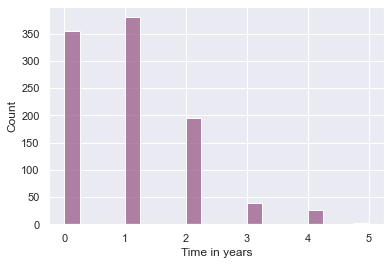

In [ ]:
# Generate 1000 random samples from the Poisson distribution
samples = np.random.poisson(1, 1000)
sns.histplot(samples,bins=20,color = sns.cubehelix_palette(8)[4])
plt.xlabel('Time in years')

Text(0.5, 0, 'Time in years')

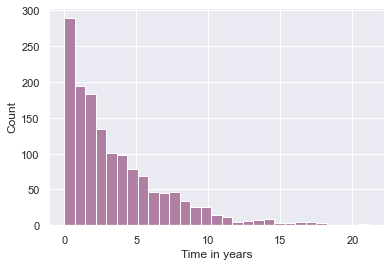

In [ ]:
sns.histplot(Aj_US_ROF_exit_df['Time_to_exit'],color = sns.cubehelix_palette(8)[4])
plt.xlabel('Time in years')

In [ ]:
dist = distfit()        # Initialize 
dist.fit_transform(Aj_US_ROF_exit_df['Time_to_exit'])

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.108179] [loc=3.620 scale=3.522]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.00338616] [loc=0.003 scale=3.618]
[distfit] >[pareto    ] [0.07 sec] [RSS: 0.0644202] [loc=-1.413 scale=1.416]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 0.09123] [loc=2.890 scale=2.684]
[distfit] >[t         ] [0.08 sec] [RSS: 0.0859142] [loc=2.743 scale=2.345]
[distfit] >[genextreme] [0.19 sec] [RSS: 0.0286501] [loc=1.623 scale=1.679]
[distfit] >[gamma     ] [0.16 sec] [RSS: 0.00265045] [loc=0.003 scale=3.844]
[distfit] >[lognorm   ] [0.13 sec] [RSS: 0.015192] [loc=-0.251 scale=2.520]
[distfit] >[beta      ] [0.27 sec] [RSS: 0.00518843] [loc=0.003 scale=22.496]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.21954] [loc=0.003 scale=21.123]
[distfit] >[loggamma  ] [0.14 sec] [RSS: 0.110069] [loc=-770.052 scale=112.554]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.gamma_gen at 0x145ede40b80>,
  'stats': 'RSS',
  'params': (0.9522302061039518, 0.00273972602739726, 3.843688903786143),
  'name': 'gamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x145f072ee20>,
  'score': 0.0026504544187641523,
  'loc': 0.00273972602739726,
  'scale': 3.843688903786143,
  'arg': (0.9522302061039518,),
  'CII_min_alpha': 0.1683656821970469,
  'CII_max_alpha': 11.159159331819865},
 'summary':          distr     score  LLE         loc      scale  \
 0        gamma   0.00265  NaN     0.00274   3.843689   
 1        expon  0.003386  NaN     0.00274   3.617515   
 2         beta  0.005188  NaN     0.00274  22.495571   
 3      lognorm  0.015192  NaN   -0.251088   2.520146   
 4   genextreme   0.02865  NaN    1.623196   1.678742   
 5       pareto   0.06442  NaN   -1.413481    1.41622   
 6            t  0.085914  NaN    2.742974    2.34467   
 7     dweibull   0.09123  NaN    2.889654   2.683997   
 8  

In [ ]:
# dist = distfit(distr = 'lognorm',smooth = 10)        # Initialize 
# disfit_result_duration = dist.fit_transform(Aj_US_ROF_exit_df['Time_to_exit'])

In [ ]:
Time_to_exit_params = dist.model['params']
Time_to_exit_params

(0.9522302061039518, 0.00273972602739726, 3.843688903786143)

Text(0.5, 0, 'Time in years')

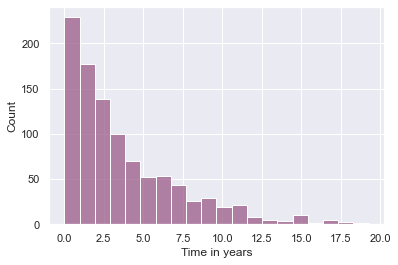

In [ ]:
samples = scipy.stats.gamma.rvs(Time_to_exit_params[0],loc=Time_to_exit_params[1],scale=Time_to_exit_params[2], size=1000)
sns.histplot(samples[samples < 20],bins=20,color = sns.cubehelix_palette(8)[4])
plt.xlabel('Time in years')

####  Exit value follows a jump-diffusion process

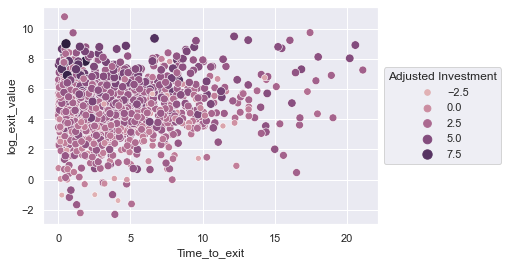

In [ ]:
g = sns.scatterplot(data=Aj_US_ROF_exit_df, x="Time_to_exit", y="log_exit_value", hue='log_adjust_investment_amount',size='log_adjust_investment_amount',sizes=(20, 100))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Adjusted Investment')

<AxesSubplot:xlabel='Time_to_exit', ylabel='log_exit_value'>

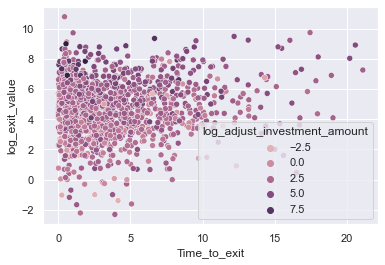

In [ ]:
sns.scatterplot(data=Aj_US_ROF_exit_df, x="Time_to_exit", y="log_exit_value", hue='log_adjust_investment_amount')

### Selection Model

#### Confirm the parameters value

In [ ]:
I = 20
K = 1000
Max_investment_length = 10 # In years
Number_of_rounds = 2 # suppose all invested in two rounds
Invest_per_round = 20 
Expacted_exit_value_per_company = 400

#### find minimum terminated round in each k

In [ ]:
# Investment

# Test of creating class
# class selection_problem():
#     def __init__(self, I=20, K=1000, Max_investment_length=10,Expacted_exit_value_per_company=3,duration_params = [3.1678816394371356, 2.742974039423639, 2.3446702170311653], adjust_invest_reg_params = [3.645460,0.462772,-0.491353]):
#         self.I = I #number of companies
#         self.K = K #number of iterations
#         self.Max_investment_length = Max_investment_length 
#         self.Expacted_exit_value_per_company = Expacted_exit_value_per_company
#         self.adjust_invest_reg_params = adjust_invest_reg_params # parameters fitted from regression
#         self.duration_params = duration_params
        
#     def k_times_terminated_rounds(self):
#         # Simulate completion time
# #         elements = [4,5,6,7,8]
# #         probabilities = [0.1,0.3,0.3,0.2,0.1]
# #         completion_time = np.random.choice(elements, self.I, p=probabilities)

#         completion_time_fra = scipy.stats.lognorm.rvs(self.duration_params[0],loc=self.duration_params[1],scale=self.duration_params[2], size=self.I)
#         completion_time_int = np.rint(completion_time_fra)
#         completion_time = np.array([i if i < Max_investment_length else Max_investment_length for i in completion_time_int])
        

#         rand_numbe_lognorm = scipy.stats.lognorm.rvs(self.params_exit_adjinvest[0],loc=self.params_exit_adjinvest[1],scale=self.params_exit_adjinvest[2], size=self.I)
#         # simulation: rand_numbe_lognorm = exit_value/sum_of_investment
#         sum_of_investment = (np.power(1.05,completion_time-1) - 1)/0.05 
        
#         exit_value_of_companies = rand_numbe_lognorm*sum_of_investment

        
#         sum_exit_return = 0
#         total_number_of_exit_companies = 0
#         for invest_rounds in range(self.Max_investment_length):
#             invest_each_round = np.power(1.05,invest_rounds)
#             for company_i in range(self.I):
#                 # Complete = reach completion rounds
#                 if invest_rounds >= completion_time[company_i]:
#                     # Only when net return>1 then we exit,or we terminate the investment in that company
#                     if ((exit_value_of_companies[company_i] - sum_of_investment[company_i]) > 1) & (invest_rounds == completion_time[company_i]):
#                         sum_exit_return = sum_exit_return + exit_value_of_companies[company_i] 
#                         total_number_of_exit_companies = total_number_of_exit_companies + 1
#                         #print('Company',company_i,'Finish at rounds',completion_time[company_i],':',exit_value_of_companies[company_i])
#                 # Not reaching completion rounds
#                 else:
#                     sum_exit_return = sum_exit_return - invest_each_round
#             if sum_exit_return > self.Expacted_exit_value_per_company*self.I:
#                 break

#         return invest_rounds,sum_exit_return,total_number_of_exit_companies
    
#     def k_times_terminated_rounds_resultDF(self):
#         investment_terminated_time = []
#         sum_of_return = []
#         n_comp = []
#         for k in range(self.K):
#             t,r,n = self.k_times_terminated_rounds()
#             investment_terminated_time.append(t)
#             sum_of_return.append(r)
#             n_comp.append(n)
#         selection_result_df = pd.DataFrame({'terminal_round':investment_terminated_time,'sum_of_return':sum_of_return,'number_of_exit_companies':n_comp})
#         return selection_result_df
    
#     def k_times_terminated_rounds_hist(self):
#         selection_result_df = self.k_times_terminated_rounds_resultDF()
#         plt.hist(selection_result_df.terminal_round)
#         plt.title('The investment rounds when portfoilo reaches the expected return {} for PE in {} simulation times'.format(self.I*self.Expacted_exit_value_per_company,self.K))
#         plt.xlabel('investment rounds')
#         plt.show()
    
#     def k_times_terminated_rounds_hist_sum_return(self):
#         selection_result_df = self.k_times_terminated_rounds_resultDF()
        
#         print(selection_result_df.groupby('terminal_round').agg({'sum_of_return':['mean', 'max', 'min','var']}))
        
#         selection_result_df['sum_of_return'].hist(by=selection_result_df['terminal_round'],figsize =(10,8))
#         plt.show()
        

In [ ]:
# First define the value you use I=20, K=1000, Max_investment_length=10,Expacted_exit_value_per_company=3,params=[1.8926501807066645, 0.0013935829239333539, 1.6564777495637903]
# test_1 = selection_problem()
# test_1_df = test_1.k_times_terminated_rounds_resultDF()
# test_1.k_times_terminated_rounds_hist()

#### Old method: Data simulation using regression

In [ ]:
# Older one 
class selection_problem_ARM_method():
    def __init__(self, I=20, K=500, Max_investment_length=20,Expacted_net_pro_ratio= 3,Time_to_exit_params= [0.9907360625882979, -0.2510879964450745, 2.5201460311724015],Invest_amount_params = [0.01, 48.55371267150928],adjust_invest_reg_params = [3.645460,0.462772,-0.491353],p=0.95):
        self.I = I #number of companies
        self.K = K #number of iterations
        self.Max_investment_length = Max_investment_length 
        self.Expacted_net_pro_ratio = Expacted_net_pro_ratio
        self.Time_to_exit_params = Time_to_exit_params
        self.Invest_amount_params = Invest_amount_params
        self.adjust_invest_reg_params = adjust_invest_reg_params # parameters fitted for exit/investment return
        self.p = p
        
    def simu_k_scenairos(self):
# Simulate the completion time use disturbution 
# Simulate the investment amount use disturbution 
# Simulate the investment time use dist
# Simulate the exit value use regression result

#         elements = [4,5,6,7,8]
#         probabilities = [0.1,0.3,0.3,0.2,0.1]

        completion_time_Ktimes = []
        invest_amount_Ktimes = []
        invest_2_time_Ktimes = []
#         exit_value_Ktimes = []
#         sum_of_invest_Ktimes = []
        

        for k in range(self.K):
#             completion_time = np.random.choice(elements, self.I, p=probabilities)
#             completion_time_Ktimes.append(completion_time)
            
            completion_time_lognorm = scipy.stats.lognorm.rvs(self.Time_to_exit_params[0],loc=self.Time_to_exit_params[1],scale=self.Time_to_exit_params[2], size=self.I)
            completion_time_int = np.rint(completion_time_lognorm)
            completion_time = np.array([i if i < self.Max_investment_length else self.Max_investment_length for i in completion_time_int])
            completion_time_Ktimes.append(completion_time)
            
#             rand_numbe_lognorm = scipy.stats.lognorm.rvs(self.params[0],loc=self.params[1],scale=self.params[2], size=self.I)  
#             sum_of_investment = (np.power(1.05,completion_time-1) - 1)/0.05 
#             sum_of_investment_Ktimes.append(sum_of_investment)
            
#             invest_1 = scipy.stats.expon.rvs(self.Invest_amount_params[0],self.Invest_amount_params[1], size=self.I)
            invest_1 = np.repeat(10,self.I)
            invest_2 = invest_1 + (scipy.stats.binom.rvs(1, p=0.85,size=self.I) - 0.5)*10
        
            elements = [1.0,2.0,3.0,4.0,7.0,9.0]
            probabilities = [0.4,0.3,0.2,0.09,0.005,0.005]
            second_invest_time = np.random.choice(elements, self.I, p=probabilities)
            
#             # Make sure second investment time before the completion
#             for comp in rang(self.I):
#                 if second_invest_time[comp] > completion_time[comp]:
#                     second_invest_time[comp] = completion_time[comp]
            
            invest_amount_Ktimes.append(np.array([invest_1,invest_2]))
            invest_2_time_Ktimes.append(second_invest_time)

#             exit_value_of_companies = rand_numbe_lognorm*sum_of_investment
#             exit_value_of_companies_Ktimes.append(exit_value_of_companies)
        
            
#         completion_time_Ktimes = np.array(completion_time_Ktimes)
#         sum_of_investment_Ktimes = np.array(sum_of_investment_Ktimes)
#         exit_value_of_companies_Ktimes = np.array(exit_value_of_companies_Ktimes)
        
        completion_time_Ktimes = np.array(completion_time_Ktimes)
        invest_amount_Ktimes = np.array(invest_amount_Ktimes)
        invest_2_time_Ktimes = np.array(invest_2_time_Ktimes)
#         sum_of_invest_Ktimes = np.array(sum_of_invest_Ktimes)
#         exit_value_Ktimes = np.array(exit_value_Ktimes)
        

        return completion_time_Ktimes,invest_amount_Ktimes,invest_2_time_Ktimes
    
        

    def ARM_mini_investments_rounds(self):
    
        completion_time_Ktimes,invest_amount_Ktimes,invest_2_time_Ktimes= self.simu_k_scenairos()
        
        # Net return vetor --- Start with deducing the first investment 
        # Example: Investment_time = 2, I = 3, k = 4
        # x = np.array([[[2,3],[4,5],[4,7]],[[1,3],[4,5],[4,7]],[[2,4],[4,5],[4,7]],[[1,4],[4,5],[4,7]]])
        # np.sum(x,axis=1).T[0]
        sum_exit_return_list = np.zeros((self.K))
        
        # Company's status in the portfolio
        company_invest_status = np.zeros((self.Max_investment_length,self.K,self.I))
        
        # Companies go though second round
        company_rounds = np.ones((self.K,self.I))
        
        for invest_rounds in range(self.Max_investment_length):
#             invest_each_round = np.power(1.05,invest_rounds)
            beta = 0 # number of simulation when the sum of return > threshold
    # Every round calculate a new sum 
            sum_exit_return_list = -np.sum(invest_amount_Ktimes,axis =1).T[0] * np.power(1.05,invest_rounds)
            sum_investment_list = np.sum(invest_amount_Ktimes,axis =1).T[0] * np.power(1.05,invest_rounds)
            
            for k in range(self.K):
                for company_i in range(self.I):
                    
                    # Suppose 25% company failed
#                     failed_comp = np.random.randint(self.I, size=5)
                    
                    # Second investment --- time & company no exit
                    if (invest_rounds >= invest_2_time_Ktimes[k][company_i]) & (company_invest_status[invest_rounds][k][company_i] == 0):
                        company_rounds[k][company_i] = 2
                        sum_exit_return_list[k] = sum_exit_return_list[k] - invest_amount_Ktimes[k][1][company_i]* np.power(1.05,invest_rounds - invest_2_time_Ktimes[k][company_i])
                        sum_investment_list[k] = sum_investment_list[k] + invest_amount_Ktimes[k][1][company_i]* np.power(1.05,invest_rounds - invest_2_time_Ktimes[k][company_i])
                    
                    # Complete = reach completion rounds ( exit or give up)
                    if invest_rounds >= completion_time_Ktimes[k][company_i]:
                        company_invest_status[invest_rounds][k][company_i] = 1
                        
                        # Number of rounds company go through
                        if company_rounds[k][company_i] == 2:
                            # Calulate the adj investment
                            adj_invest = invest_amount_Ktimes[k][0][company_i]*np.power(1.05,invest_rounds) + invest_amount_Ktimes[k][1][company_i]*np.power(1.05,invest_rounds-invest_2_time_Ktimes[k][company_i])
                            exit_value = np.exp(self.adjust_invest_reg_params[0] + self.adjust_invest_reg_params[1]*np.log(adj_invest) + self.adjust_invest_reg_params[2]*np.log(2))
                        else:
                            adj_invest = invest_amount_Ktimes[k][0][company_i]*np.power(1.05,invest_rounds)
                            exit_value = np.exp(self.adjust_invest_reg_params[0] + self.adjust_invest_reg_params[1]*np.log(adj_invest))
                        
                        # If company failed 
#                         if company_i in failed_comp:
#                             exit_value = 0
                        
                        # Exit > Invest then Success Exit
                        if exit_value > adj_invest:
                            sum_exit_return_list[k] = sum_exit_return_list[k] + exit_value
                        
                        
                if sum_exit_return_list[k]/sum_investment_list[k] > self.Expacted_net_pro_ratio:
                    beta = beta + 1
            if beta >= self.K*self.p:
                break

        return invest_rounds
    
    def ARM_repeat_robust_experiment(self,repeat_times):
        repeat_result = [self.ARM_mini_investments_rounds() for i in range(repeat_times)]
        
        return repeat_result,np.mean(np.array(repeat_result))

1. Define parameters:
- I name of companies -- 20
- ！！K scenairos -- 500-1000 \\
- T maximum investment length --- 10 years
- ！！ p risk acceptability --- 0.05
- In investment amount --- 20 per investment 

2. Generate prediction for 
- Exit Time --- Gamma disturbution --- two parameters
- Time for funding/investment --- every 2 year --- average 1.8  

- Exit value --- log normal, time decides by Time to exit + 60% failure rate ?

3. Experiment 
- input:  Parameters in 1 and for 2
- output: descion matrix y + termiated round 

4. Parameters to compare
- p risk acceptibility

#### Firm value: Geo brownian model

In [ ]:
def merton_paths(S=58, T=10, r=0.02, sigma=0.5, steps=100, Npaths=10):
    size=(steps,Npaths)
    dt = T/steps 
    geo = np.cumsum(((r -  sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo)*S

In [ ]:
def geo(S=58, T=10, r=0.02, sigma=0.5, steps=100, Npaths=10):
    size=(steps,Npaths)
    dt = T/steps 
    geo = np.cumsum(((r -  sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    
    return geo

Text(0, 0.5, 'Firm value')

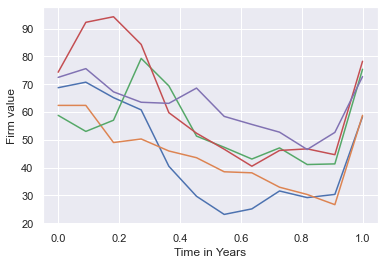

In [ ]:
S = 58 # inital firm value
T = 1 # time to maturity in years
r = 0.025 + 0.01  # risk free rate + PE positive effect
steps = 12 # time steps
Npaths = 5 # number of paths to simulate
sigma = 0.5 # following Cochrane (2005), Metrick and Yasuda (2010a), and Gornall and Strebulaev (2020).

j1 = merton_paths(S, T, r, sigma, steps, Npaths)
j1[-1] = j1[-1]+30

x = np.linspace(0,T,steps)
plt.plot(x,j1)
plt.xlabel('Time in Years')
plt.ylabel('Firm value')

In [ ]:
j1[-1] + np.log(30)/j1[-1]

array([58.37234023, 58.84549984, 75.41209404, 78.28219581, 72.77389698])

In [ ]:
np.exp(j1[-1])*S*(1+30/S)

array([1.86181902e+27, 2.98973123e+27, 4.74176392e+34, 8.37777464e+35,
       3.38434087e+33])

#### Current Method: miminmum investment time 95% in k simulations

Assumption that cannot be replicated in stock portfolio management:
1. The jump increment for the price prediction
2. Exit time -- Investment terminal time is randomly predefined (only at the exit time it generate profit) 
- This means that even if the firm value is high, we cannot calculate the value into the portfolio if it haven't exit yet.

My model --- Conditions whether in the porfolio:
1. same position all investers in the beginning 
2. simulate 1000 firm increase.

Conditions for whether invest:
1. use the mean/cov of simulation & markowitz for the investment descision 
2. the upper/ lower boundary for firm value 

Testing

In [70]:
# The firm value increment has unit in 1 
def fimevalue(s0):
    size= 12
    dt = 1/12 
    # r,sigma = 0.02, 0.5
    r,sigma = 1/size, 0.5/size
    geo = np.cumsum(((r -  sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    return np.exp(geo[-1])*s0
        

In [75]:
fimevalue(100)

110.78501905085348

In [5]:
0.2*np.log(1.3)+0.025

0.07747285289349821

In [44]:
np.exp(np.random.normal(mu,0.85))*84

78.88652957863351

In [119]:
np.ones((2,3))[:2]

array([[1., 1., 1.],
       [1., 1., 1.]])

formal code

In [139]:
# Revised one
class selection_problem_ARM_method_revise():
    def __init__(self, I=20, K=500, inital_firm_value=100,Max_investment_length=20,Expacted_net_pro_ratio=3,Time_to_exit_params=[0.952, 0.00273, 3.843],p=0.95):
        self.I = I #number of companies
        self.K = K #number of iterations
        self.inital_firm_value = inital_firm_value
        self.Max_investment_length = Max_investment_length 
        self.Expacted_net_pro_ratio = Expacted_net_pro_ratio
        self.Time_to_exit_params = Time_to_exit_params
        self.p = p
        
    def simu_k_scenairos(self):
        completion_time_Ktimes = []

        for k in range(self.K):

            completion_time_lognorm = scipy.stats.gamma.rvs(self.Time_to_exit_params[0],loc=self.Time_to_exit_params[1],scale=self.Time_to_exit_params[2], size=self.I)
            completion_time = np.rint(completion_time_lognorm)
            completion_time_Ktimes.append(completion_time)
        
        completion_time_Ktimes = np.array(completion_time_Ktimes)
        

        return completion_time_Ktimes
    
    # np.exp(geo)*S0
    
    def fimevalue(self,s0):
        size= 12
        dt = 1/12 
        # r,sigma = 0.02, 0.5
        r,sigma = 1/size, 0.5/size
        geo = np.cumsum(((r -  sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
        return np.exp(geo[-1])*s0
        
    def ARM_mini_investments_rounds(self):
    
        completion_time_Ktimes= self.simu_k_scenairos()
        
        # descision variable: Company's status in the portfolio --- 0 in 1 out
        company_invest_status = np.zeros((self.Max_investment_length,self.K,self.I))
        
        # random var: Company's firm value
        # firm_value_increase = np.zeros((self.K,self.I,self.Max_investment_length))
        
        # firm value
        firm_value = np.full((self.K,self.I,self.Max_investment_length),self.inital_firm_value)
        
        # Investment in each round 
        invest_each_round = [10,40,40,40]
        
        #Exercise boundary for firm value
        exer_boundary = np.repeat(np.expand_dims(np.arange(50,35+self.Max_investment_length), axis = 0),repeats = 2, axis = 0)
        
        # Number of rounds of investment companies go though 
        company_rounds = np.ones((self.K,self.I),dtype = int)
        
        # Sum of investment
        sum_investment_list = np.full(self.K,invest_each_round[0])
        
        # Sum of return
        sum_exit_return_list = np.zeros(self.K)
        
        number_company_exit = np.zeros(self.K,dtype = int)
        
        # Sum of measure
        mDPI = np.zeros((self.Max_investment_length,self.K))
        
        success = 0
        for t in range(1,self.Max_investment_length):

            beta = 0 # number of simulation when the sum of return > threshold
    
            for k in range(self.K):
            
                for company_i in range(self.I):

                    
                    # Check if company is still in portfolio
                    if company_invest_status[t][k][company_i]== 0:
                        
                        firm_value[k][company_i][t] = self.fimevalue(firm_value[k][company_i][t-1])
                        
                        # Complete = reach completion rounds 
                        if t == completion_time_Ktimes[k][company_i]:
                            company_invest_status[t][k][company_i] = 1
                            
                            # firm value at exit + investment 
                            # exit_value = np.exp(np.sum(firm_value_increase[k][company_i][:t]))*58 + np.sum(invest_each_round[:(company_rounds[k][company_i]-1)])
                            
                            # Add the terminated firm value
                            # sum_exit_return_list[k] = sum_exit_return_list[k] + exit_value
                            sum_exit_return_list[k] = sum_exit_return_list[k] + firm_value[k][company_i][t]

                            # All later rounds firms status = 1
                            company_invest_status[t:,k,company_i] = np.ones((self.Max_investment_length-t))
                                    
                        # For company still in the portfolio and need investment
                        elif (company_rounds[k][company_i] != len(invest_each_round)):

                            # For the sencond round and third round, the first round is already invested
                            for invest_rounds in range(1,len(invest_each_round)-1):
                                
                                # check rounds and firm value 
                                # if (company_rounds[k][company_i] == invest_rounds) & (firm_value[k][company_i][t]> exer_boundary[invest_rounds-1][t-1]):
                                if (company_rounds[k][company_i] == invest_rounds):
                                    company_rounds[k][company_i] = invest_rounds + 1
                                    # dt = 1/12
                                    # firm_value_increase[k][company_i][t] = firm_value_increase[k][company_i][t] + invest_each_round[invest_rounds]/12
                                    # firm_value_increase[k][company_i][t] = firm_value_increase[k][company_i][t] * (company_rounds[k][company_i]+0.9)
                                    firm_value[k][company_i][t] = firm_value[k][company_i][t] + invest_each_round[invest_rounds]

                                    sum_investment_list[k] = sum_investment_list[k] + invest_each_round[invest_rounds]
                                    # print('sum investeme',sum_investment_list[k])
                        

                mDPI[t][k] = sum_exit_return_list[k]/sum_investment_list[k]
                number_company_exit[k] = np.sum(company_invest_status[t][k][:])
                if sum_exit_return_list[k]/sum_investment_list[k] > self.Expacted_net_pro_ratio:
                    beta = beta + 1
                    
            if beta >= self.K*self.p:
                success = 1

                return t,np.quantile(mDPI[t],1-self.p),np.mean(number_company_exit)
                break 


        if (t == self.Max_investment_length-1) & (success == 0):
            # print('Not reachable',np.mean(mDPI))
            # print('Not reachable',mDPI)
            # print('Not reachable',np.mean(mDPI))
                            # PLot disrtubution for mDPI
            # df = pd.DataFrame({'Investment Period of the PE Fund': np.repeat(np.arange(t),self.K),
            #                        'Simulation label': np.tile(np.arange(self.K),t),
            #                      'Maximum Payoff R':mDPI[:t].flatten()})
            # sns.lineplot(data=df, x="Investment Period of the PE Fund", y="Maximum Payoff R")

            return np.nan,np.nan,np.mean(number_company_exit)
        
    
    def ARM_repeat_robust_experiment(self,repeat_times):
        repeat_result_t_list = []
        repeat_result_R_star_list = []
        repeat_num_comp_list = []
        for i in range(repeat_times):
            repeat_result_t,repeat_result_R_star,repeat_num_comp = self.ARM_mini_investments_rounds()
            repeat_result_t_list.append(repeat_result_t)
            repeat_result_R_star_list.append(repeat_result_R_star)
            repeat_num_comp_list.append(repeat_num_comp)
        
        nan_count = np.sum(np.isnan(repeat_result_t_list))
        
        if nan_count > repeat_times*0.2:
            return np.nan,np.nan,np.mean(repeat_num_comp_list)
        else:
            return np.nanmean(repeat_result_t_list),np.nanmean(repeat_result_R_star_list),np.mean(repeat_num_comp_list)

(nan, nan, 16.6)

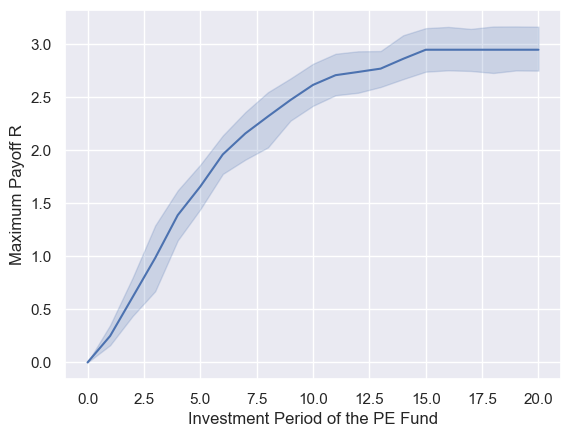

In [140]:
test_ARM_revised = selection_problem_ARM_method_revise(K=10, Max_investment_length = 22,inital_firm_value=100,Expacted_net_pro_ratio = 3.5,p=0.9)
test_ARM_revised.ARM_mini_investments_rounds()

In [ ]:
test_ARM_revised.ARM_repeat_robust_experiment(10)

(nan, nan, 16.8568)

##### Robust test for repeat from 10 to 200; k from 100 to 1000

In [ ]:
repeat_test_times = np.arange(5,50,5,dtype=int)
robust_test_repet_df = pd.DataFrame(index = repeat_test_times)

In [ ]:
for R in [3,4,5]:   
    robust_test_repet = []
    for repeat_time in repeat_test_times:
        dif_k_test_result = selection_problem_ARM_method_revise(Expacted_net_pro_ratio=R)
        difk_avg_result = dif_k_test_result.ARM_repeat_robust_experiment(repeat_time)
        robust_test_repet.append(np.mean(np.array(difk_avg_result)))
    robust_test_repet_df[R] = np.array(robust_test_repet)

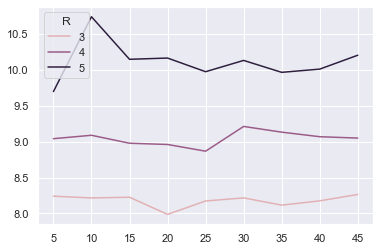

In [ ]:
sns.set()
robust_test_repet_df.plot(color = [sns.cubehelix_palette(8)[1],sns.cubehelix_palette(8)[4],sns.cubehelix_palette(8)[7]])
plt.legend(title='R')

In [ ]:
# d = {'R':np.repeat(np.array([3,3.5,4]), 12),'Repeated time':np.tile(np.array(np.arange(0,60,5, dtype=int)), 3),'Terminated Rounds': [1.5,1.7,1.2,1.4,1.3,1.5,1.2,1.3,1.4,1.2,1.3,1.3,2.5,2.8,3.2,3.1,2.7,3.4,2.9,2.75,2.8,2.6,2.7,2.7,4.3,4.9,5.2,4.1,4.5,4.6,4.9,4.75,4.83,4.85,4.79,4.81]}
# Test_result = pd.DataFrame(data=d)
# fig, ax = plt.subplots()
# sns.lineplot(data=Test_result,y='Terminated Rounds',x='Repeated time',hue='R')

In [ ]:
# d = {'R':np.repeat(np.array([3,3.5,4]), 12),'K':np.tile(np.array(np.arange(0,60,5, dtype=int)), 3),'Terminated Rounds': [1.5,1.6,1.2,1.4,1.35,1.4,1.29,1.31,1.34,1.31,1.36,1.35,2.5,2.8,3.2,3.1,2.7,2.95,2.9,2.75,2.73,2.68,2.7,2.7,4.3,4.5,5.1,4.8,4.5,4.6,4.9,4.75,4.83,4.85,4.79,4.81]}
# Test_result = pd.DataFrame(data=d)
# fig, ax = plt.subplots()
# sns.lineplot(data=Test_result,y='Terminated Rounds',x='K',hue='R')

##### Result for different expected payoff and p-value

In [ ]:
# R_expected = [10,30,50,70,90,100]
# p_value = [0.1,0.5,0.8,0.95]
# ARM_simreg_result = pd.DataFrame({'Expected Net Return':R_expected})
# terminated_rounds = []
# for p_v in p_value:
#     for r in R_expected:
#         test_result = selection_problem_ARM_method(Expacted_net_pro_rao_per_company= r, p = p_v)
#         terminated_rounds.append(test_result.ARM_mini_investments_rounds())

In [97]:
Ratio_expected = [1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8]
p_value = [0.85,0.9,0.95,0.99]
repeat_times = 10
ARM_simreg_result = pd.DataFrame({'Expected Net Return Ratio':Ratio_expected})
terminated_rounds = []
max_payoff_ratio=[]
num_comp = []
for p_v in p_value:
    for r in Ratio_expected:
        test_result_t = selection_problem_ARM_method_revise(Expacted_net_pro_ratio= r, p = p_v)
        avg_result_t,avg_result_R,avg_result_num_comp = test_result_t.ARM_repeat_robust_experiment(repeat_times)
        terminated_rounds.append(avg_result_t)
        max_payoff_ratio.append(avg_result_R)
        num_comp.append(avg_result_num_comp)

sum_exit_return_list [4372. 3253. 4169. 3789. 4473. 4204. 3928. 3851. 4751. 4323. 4566. 3186.
 2590. 3166. 4596. 4016. 3744. 4355. 4828. 4724. 3614. 4443. 3791. 4009.
 5039. 3682. 5194. 4754. 3171. 4912. 3967. 4567. 3442. 4422. 3407. 4250.
 5304. 3244. 4408. 3612. 5142. 4395. 3086. 3639. 3296. 3740. 4196. 4671.
 4632. 3806. 4359. 4019. 3151. 3941. 3356. 4507. 4062. 4699. 4445. 3158.
 3057. 3917. 4140. 2771. 4295. 3825. 3872. 4321. 4083. 5026. 4350. 3723.
 3940. 3999. 3219. 4360. 3867. 5425. 3668. 3882. 4109. 3445. 3613. 4567.
 3216. 3730. 4428. 3744. 4039. 3383. 3737. 4175. 4174. 4502. 3980. 4007.
 4695. 3669. 4349. 2952. 3908. 4079. 3850. 3767. 4199. 4175. 4353. 3629.
 4119. 3087. 4198. 3717. 3617. 3653. 3852. 3869. 3608. 4709. 4069. 3838.
 5260. 4583. 3797. 4559. 3464. 4710. 3251. 3662. 3422. 3940. 4293. 3072.
 3923. 5158. 3300. 3994. 4295. 5300. 4690. 3867. 2971. 4811. 4066. 2784.
 3193. 3719. 4423. 4158. 4085. 4473. 5199. 3587. 4049. 3969. 3280. 4957.
 4177. 3754. 3693. 3875. 4638.

In [101]:
ARM_simreg_result = pd.DataFrame({'Expected Net Payoff Ratio':np.tile(Ratio_expected,len(p_value)),
                                 'p-value':np.repeat(p_value,len(Ratio_expected)),
                                 'Investment Period of the PE Fund':terminated_rounds,
                                 'Maximun Payoff Ratio':max_payoff_ratio,
                                 'Number of Companies Successfully Exit':num_comp})

In [102]:
ARM_simreg_result

,Expected Net Payoff Ratio,p-value,Investment Period of the PE Fund,Maximun Payoff Ratio,Number of Companies Successfully Exit
0,1.2,0.85,4.4,1.333893,12.0148
1,1.4,0.85,5.0,1.485326,12.8016
2,1.6,0.85,6.0,1.705087,13.8386
3,1.8,0.85,7.0,1.900905,14.6372
4,2.0,0.85,8.0,2.063164,15.2552
5,2.2,0.85,9.9,2.268624,16.0264
6,2.4,0.85,11.8,2.441120,16.5322
7,2.6,0.85,16.2,2.612145,16.9920
8,2.8,0.85,NaN,NaN,17.1526
9,1.2,0.90,5.0,1.384065,12.8138


Text(0, 0.5, 'Expected Payoff R')

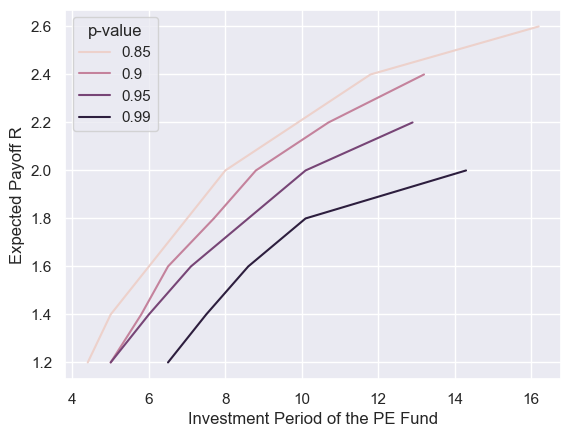

In [106]:
sns.lineplot(data=ARM_simreg_result,y='Expected Net Payoff Ratio',x='Investment Period of the PE Fund',hue='p-value')
plt.ylabel('Expected Payoff R')

<AxesSubplot:xlabel='Expected Net Payoff Ratio', ylabel='Terminated Rounds of the Fund'>

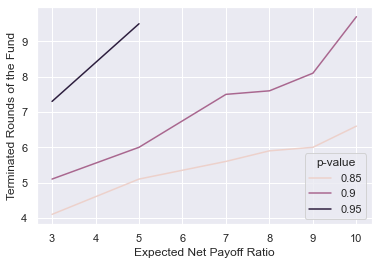

In [ ]:
sns.lineplot(data=ARM_simreg_result,x='Expected Net Payoff Ratio',y='Terminated Rounds of the Fund',hue='p-value')

(4.0, 14.0)

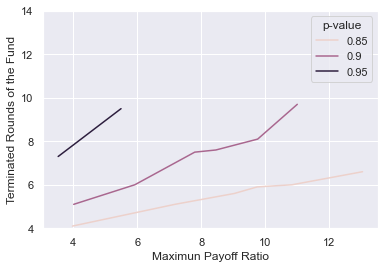

In [ ]:
sns.lineplot(data=ARM_simreg_result,x='Maximun Payoff Ratio',y='Terminated Rounds of the Fund',hue='p-value')
plt.ylim((4,14))

### Additional coding

#### Jump Diffusion for exit value

$dX_t = X_t(r_f +\alpha)dt + X_t \sigma dW_t + I_i dN_t$

In [ ]:
def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S

In [4]:
S = 58 # current stock price
T = 5 # time to maturity
r = 0.035 # risk free rate
m = 0.2 # meean of jump size
v = 0 # standard deviation of jump
lam = 4 # intensity of jump i.e. number of jumps per annum
steps = 100 # time steps
Npaths = 10 # number of paths to simulate
sigma = 0.5 # annaul standard deviation , for w
j = merton_jump_paths(S, T, r, sigma, lam, m,v, steps, Npaths)
x = np.linspace(0,10,steps)

plt.plot(x,j)
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('Time in Years')

plt.ylabel('Firm Value')

NameError: name 'merton_jump_paths' is not defined

##### BS Call price

In [ ]:
def bs_price(S, K, T, r, sigma, call=True):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if call:
        return S * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)
    else:
        return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

In [ ]:
# T1 = 0 T2 =1 T3 = 3
T = 2    # T2 - T1
S0 = 36.64 # firm value at t1
K =  20   # K_2
r = 0.05   # risk-free interest rate

# Model parameter
sigma = 0.5 # volatility

C_bs = bs_price(S0, K, T, r, sigma, call=True) # When S0 > V*=39, C_bs > K_1=20 
C_bs

20.008130859868974

In [ ]:
from scipy.optimize import fsolve

def f(S0,*args):
    K,T,r,sigma,optionPrice=args
    return bs_price(S0,K,T,r,sigma,True)-optionPrice

K,T,r,sigma= 20,1,0.03,0.5
optionPrice = 20
impliedS0=fsolve(f,x0=30,args=(K,T,r,sigma,optionPrice))[0]
impliedS0

38.9060562685032

#### Disturbution for investment amount

In [ ]:
np.median(Deal_US_ROF['Total Transaction Value ($M)'])

11.0

In [ ]:
dist = distfit()
dist.fit_transform(Deal_US_ROF['Total Transaction Value ($M)'])

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.65718e-05] [loc=48.564 scale=286.948]
[distfit] >[expon     ] [0.00 sec] [RSS: 3.95467e-06] [loc=0.010 scale=48.554]
[distfit] >[pareto    ] [0.07 sec] [RSS: 2.65546e-05] [loc=-3.246 scale=3.256]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 2.98488e-05] [loc=7.000 scale=14.596]
[distfit] >[t         ] [0.04 sec] [RSS: 3.41945e-05] [loc=8.799 scale=6.639]
[distfit] >[genextreme] [0.08 sec] [RSS: 3.83354e-05] [loc=4.215 scale=3.745]
[distfit] >[gamma     ] [0.07 sec] [RSS: 4.07468e-05] [loc=0.010 scale=4.001]
[distfit] >[lognorm   ] [0.05 sec] [RSS: 2.25982e-05] [loc=-0.250 scale=11.908]
[distfit] >[beta      ] [0.09 sec] [RSS: 1.35785e-05] [loc=0.010 scale=85882.446]
[distfit] >[uniform   ] [0.0 sec] [RSS: 3.98579e-05] [loc=0.010 scale=7499.990]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 2.80101e-05] [loc=-81718.777 scale=11451.149]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.expon_gen at 0x18111a9f3d0>,
  'stats': 'RSS',
  'params': (0.01, 48.55371267150928),
  'name': 'expon',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x18114424ac0>,
  'score': 3.9546719850134356e-06,
  'loc': 0.01,
  'scale': 48.55371267150928,
  'arg': (),
  'CII_min_alpha': 2.500479877668268,
  'CII_max_alpha': 145.46392405090765},
 'summary':          distr     score  LLE           loc         scale  \
 0        expon  0.000004  NaN          0.01     48.553713   
 1         beta  0.000014  NaN          0.01  85882.445656   
 2      lognorm  0.000023  NaN      -0.24974     11.907734   
 3       pareto  0.000027  NaN     -3.245709      3.255709   
 4         norm  0.000027  NaN     48.563713    286.947626   
 5     loggamma  0.000028  NaN -81718.776772  11451.148763   
 6     dweibull   0.00003  NaN           7.0     14.596162   
 7            t  0.000034  NaN      8.798908      6.639349   
 8   genextreme  0.000038  N

#### TIme between rounds

In [ ]:
Deal_US_ROF.Round_diff.hist(bins = 30)

In [ ]:
elements = [0.5,1.0,1.5,2.0,3.0,4.0,5.0,8.0,10.0]
probabilities = [0.2,0.3,0.25,0.15,0.06,0.03,0.005,0.005]


#### Disturbution for Exit value/ adjuested investment amount

In [ ]:
dist = distfit(distr = 't',smooth = 10)        # Initialize 
disfit_result_exit_adj_invest = dist.fit_transform(Aj_US_ROF_exit_df['exit_value']/Aj_US_ROF_exit_df['adjust_investment_amount'] )

exit_divid_adj_invest_params = dist.model['params']
exit_divid_adj_invest_params

In [ ]:
Exit_adj_invest_params = dist.model['params']
Exit_adj_invest_params

In [ ]:
test_rand_exit_aj = scipy.stats.lognorm.rvs(Exit_adj_invest_params[0],loc=Exit_adj_invest_params[1],scale=Exit_adj_invest_params[2], size=10)
test_rand_exit_aj

#### Parameters for the Model --- the failure rate 25% company cannot complete in + 10 years 50% company 0 return 

In [ ]:
firmvalue = np.zeros((10,20))
firmvalue[1]

In [ ]:
exer_boundary = [[38.56,36.64,35,33.5,32,31,30,29,28,27],
                 [38.56,36.64,35,33.5,32,31,30,29,28,27]]

In [ ]:
exer_boundary[0][0]

In [ ]:
def GEM_value(s0=50,t=1):
    mu,sigma = 0.02,0.5
    GEM = s0*np.exp((mu-sigma**2)*t + sigma*np.random.normal(0,np.sqrt(t)))
    
    return GEM

In [ ]:
I = 20
Max_investment_length = 10
S0 = 58
# investment amount for each round 
invest_amount = [20,20,30]
# exercise boundary for current firm value at different time (from t =1) 
exer_boundary = [[38.56,36.64,35,33.5,32,31,30,29,28],
                 [38.56,36.64,35,33.5,32,31,30,29,28]]
                 


# firmvalue = np.zeros((T,I))
# firm value after the first year & first round
firmvalue = np.array([GEM_value(s0,1) for x in range(I)]) 
# rounds done for company i
round_done = np.ones(I)
# investment period for each company 
completion_time_gamma = scipy.stats.gamma.rvs(Time_to_exit_params[0],loc=Time_to_exit_params[1],scale=Time_to_exit_params[2], size=I)
completion_time_int = np.rint(completion_time_gamma)
completion_time_Ktimes.append(completion_time)

invest_total = 0

for t in range(2,Max_investment_length):
    for i in range(len(firmvalue)):
        # check whether go through second investment 
        if (round_done[i] == 1) & firmvalue[i]> exer_boundary[0][t-2] :
            # firm value growth add invest amount 
            firmvalue[i] = GEM_value(firmvalue[i]+investment[round_done[i]],t)
            # investment total add investment 
            invest_total = invest_total + invest_amount[1]
            round_done[i] = 2
            # check whether go through the third round
        elif round_done[i] == 2 & firmvalue[i] > exer_boundary[1][t-2] :
            firmvalue[i] = GEM_value(firmvalue[i]+investment[round_done[i]],t)
            # investment total add investment 
            invest_total = invest_total + invest_amount[1]
            round_done[i] = 3
            

        
    # Threshold 39 for investment 20 in 2 years
firmvalue = [i+20 if i>39 else i for i in firmvalue] # Right after second run


#### Result : Resgression result for log_exit_value ~ log_adjust_investment_amount +  number_of_rounds

In [ ]:
adjust_invest_result = sm.ols(formula="log_exit_value ~ log_adjust_investment_amount + log_number_of_rounds", data=Aj_US_ROF_exit_df).fit()
print(adjust_invest_result.summary())

                            OLS Regression Results                            
Dep. Variable:         log_exit_value   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.83e-50
Time:                        03:18:57   Log-Likelihood:                -2787.6
No. Observations:                1450   AIC:                             5581.
Df Residuals:                    1447   BIC:                             5597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
adjust_invest_result.params

Intercept                       3.645460
log_adjust_investment_amount    0.462772
log_number_of_rounds           -0.491353
dtype: float64

In [ ]:
adjust_invest_reg_params = adjust_invest_result.params = [3.645460,0.462772,-0.491353]

##### Result : Resgression result for log_exit_value ~ log_investment_amount + number_of_rounds

In [ ]:
nonadjust_invest_result = sm.ols(formula="log_exit_value ~ log_sum_invest_amount + log_number_of_rounds", data=Aj_US_ROF_exit_df).fit()
print(nonadjust_invest_result.summary())

                            OLS Regression Results                            
Dep. Variable:         log_exit_value   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           2.02e-49
Time:                        03:18:57   Log-Likelihood:                -2790.0
No. Observations:                1450   AIC:                             5586.
Df Residuals:                    1447   BIC:                             5602.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.73

In [ ]:
nonadjust_invest_result.params

Intercept                3.736555
log_sum_invest_amount    0.459687
log_number_of_rounds    -0.455649
dtype: float64

In [ ]:
##### Result : Resgression result for log_exit_value ~ log_investment_amount + number_of_rounds

In [ ]:
# Market parameters
T = 1      # maturity
S0 = 1     # spot price
K = 1.1    # strike price
r = 0.05   # risk-free interest rate
q = 0.02   # dividend rate

# Model parameter
sigma = 0.4 # volatility

# Model parameters for the jump part
mu_j = -0.1
sigma_j = 0.15
lmbda = 0.5

# Call value
Vc = merton_jump_analytical(S0, K, T, r, q, sigma, mu_j, sigma_j, lmbda, call=True, max_iter=100, stop_cond=1e-15)

# # Put value
# Vp = merton_jump_analytical(S0, K, T, r, q, sigma, mu_j, sigma_j, lmbda, call=False, max_iter=100, stop_cond=1e-15)

print('Call price: ' + str(round(Vc, 4)))
# print('Put price:  ' + str(round(Vp, 4)))


NameError: name 'merton_jump_analytical' is not defined

In [ ]:
Invest_amount_params = dist.model['params']
Invest_amount_params

(0.01, 48.55371267150928)

In [ ]:
test_rand_exit_aj = scipy.stats.expon.rvs(Invest_amount_params[0],Invest_amount_params[1], size=10)
np.median(test_rand_exit_aj)

39.130413850376634

In [ ]:
nonadjustlog_invest_result = sm.ols(formula="log_exit_value ~ log_sum_invest_amount + number_of_rounds", data=Aj_US_ROF_exit_df).fit()
print(nonadjustlog_invest_result.summary())

                            OLS Regression Results                            
Dep. Variable:         log_exit_value   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     113.0
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           2.56e-46
Time:                        03:19:37   Log-Likelihood:                -2797.2
No. Observations:                1450   AIC:                             5600.
Df Residuals:                    1447   BIC:                             5616.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.85

#### Linear relationship: Exit value  ~ adj investment amount + number of rounds 

[Text(0.5, 1.0, 'Correlation Matrix')]

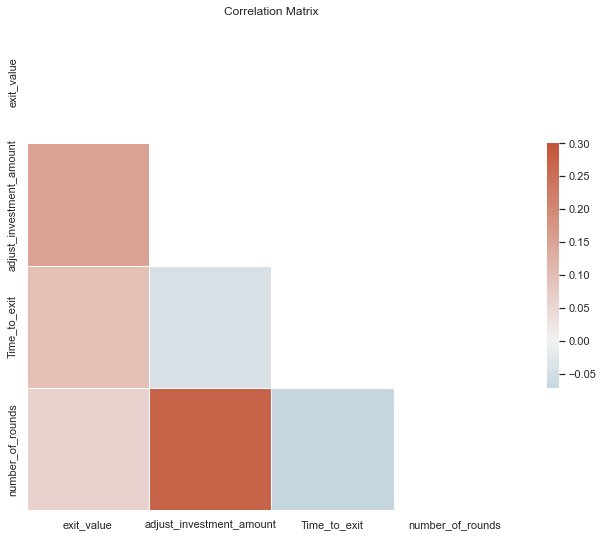

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = Aj_US_ROF_exit_df[['exit_value','adjust_investment_amount','Time_to_exit','number_of_rounds']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlation Matrix')

[Text(0.5, 1.0, 'Correlation Matrix')]

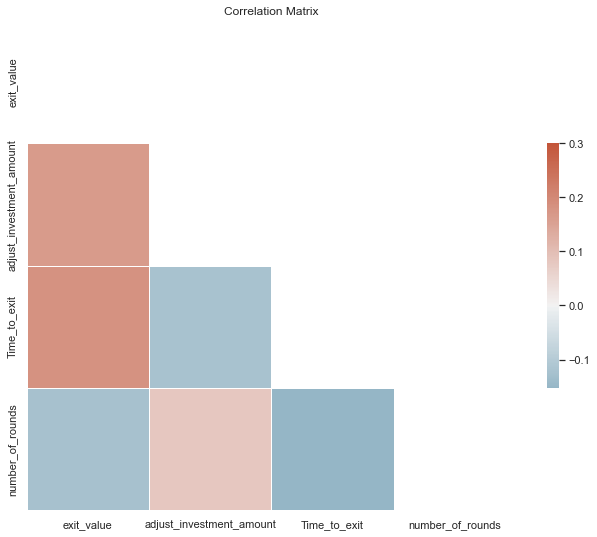

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = Aj_UK_ROF_exit_df[['exit_value','adjust_investment_amount','Time_to_exit','number_of_rounds']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlation Matrix')

In [ ]:
# Exit value uncorrlated with investment length 
# corr_duration, _ = pearsonr(reg_US_ROF_exit_df['exit_value'], reg_US_ROF_exit_df['duration'])
# print('Pearsons correlation: %.3f' % corr_duration)

In [ ]:
# corr_duration_UK, _ = pearsonr(reg_UK_ROF_exit_df['exit_value'], reg_UK_ROF_exit_df['duration'])
# print('Pearsons correlation: %.3f' % corr_duration_UK)

In [ ]:
# corr_investamount, _ = pearsonr(reg_US_ROF_exit_df['exit_value'], reg_US_ROF_exit_df['adjust_investment_amount'])
# print('Pearsons correlation: %.3f' % corr_investamount)

In [ ]:
# corr_numb_of_rounds, _ = pearsonr(reg_US_ROF_exit_df['exit_value'], reg_US_ROF_exit_df['number_of_rounds'])
# print('Pearsons correlation: %.3f' % corr_numb_of_rounds)